In [ ]:
# Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
#!pip install --upgrade pymilvus "pymilvus[model]"
#!pip install openpyxl

In [1]:
from pymilvus import MilvusClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File load

In [2]:
tracker_info=pd.read_excel("../../data/tacker_Info.xlsx", header=1)
model_df=pd.read_excel("../../data/250224 model_STD.xlsx")
maker_df=pd.read_excel("../../data/250224 maker_STD.xlsx")

/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell S424169 is marked as a date but the serial value 2200002640 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell F506984 is marked as a date but the serial value 1000039148 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


In [3]:
model_df

modelID                modelSTDName   MakerID  \
0       MO737993  RCS2-SE7C-I-60-16-250-T2-M  MA275211   
1       MO736784                   P50E-12-N     MA424   
2         MO6669                      iH1000  MA245914   
3       MO739233               SPR-903-X0675    MA2729   
4       MO886711                   CUWLS-080  MA252842   
...          ...                         ...       ...   
385608    MO6090                     DMC200A    MA2737   
385609    MO5986                  NEWVIEW600    MA2608   
385610    MO6690                   TCT-62LMV     MA622   
385611     MO954                     FAD2200    MA1487   
385612     MO955                     FAD2300    MA1487   

                                               modelAlias        category  
0                              RCS2-SE7C-I-60-16-250-T2-M  Motion Control  
1                                               P50E-12-N              RF  
2       iH1000,IH1000 HEAC,PUMP,IH1000,ITIM,W/INVRTR,D...            Pump  
3                                           SPR-903-X0675           Robot  
4                                               CUWLS-080         PKG ETC  
...                                                   ...             ...  
385608                                            DMC200A         PKG ETC  
385609                                         NEWVIEW600         PKG ETC  
385610                                          TCT-62LMV         PKG ETC  
385611                                            FAD2200         PKG ETC  
385612                                            FAD2300         PKG ETC  

[385613 rows x 5 columns]

- Ïä§ÌÉ†Îã§Îìú Î™®Îç∏Ïùò Ï†ÑÏ≤¥ Í∞ØÏàòÎäî 385,613Í∞úÏù¥Îã§. (Ïû•ÎπÑÏôÄ ÌååÏ∏† Ìè¨Ìï®)
- stardard Îç∞Ïù¥ÌÑ∞ÏûÑÏóêÎèÑ nullÍ∞íÏù¥ ÎßéÏù¥ Î≥¥Ïù∏Îã§.

In [4]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385613 entries, 0 to 385612
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   modelID       385613 non-null  object
 1   modelSTDName  385610 non-null  object
 2   MakerID       385612 non-null  object
 3   modelAlias    385599 non-null  object
 4   category      385612 non-null  object
dtypes: object(5)
memory usage: 14.7+ MB


 # Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶Ñ
 - Category_Code         
 - Category_Name         
 - MAKER_ID              Î©îÏù¥Ïª§ ID
 - MAKER_NAME            Î©îÏù¥Ïª§ Ïù¥Î¶ÑÍ≥º Îß§Ïπ≠ÎêòÏñ¥ maker_id Î∂ÄÏó¨
 - MODEL_ID              Î™®Îç∏ ID 
 - MODEL_NAME            Î™®Îç∏ name aliasÏôÄ Îß§Ïπ≠ÎêòÏñ¥ model ID Î∂ÄÌÖ®
 - Process_NM            
 - Configuration         Ï†úÌíà ÏÉÅÌÉúÏ†ïÎ≥¥
 - SERIAL_NO             
 - VINTAGE               ÏÉùÏÇ∞ÎÖÑÎèÑ
 - Tracker_availability  Ï∂îÏ†ÅÍ∞ÄÎä•?
 - Seller                ÌååÎäîÏóÖÏ≤¥
 - Owner                 ÏÜåÏú†ÌïòÍ≥† ÏûàÎäîÍ≥≥
 - USER_FAB_ID           ??
 - COUNTRY_CD            Íµ≠Í∞ÄÏΩîÎìú
 - P&C                   ??
 - CODE                  ??
 - STD_MODEL_YN          stardard Î™®Îç∏Í≥º Îß§Ïπ≠(Y), ÏïàÎêòÏóàÏùÑÎïå (N)
 - STD_MAKER_YN          stardard Î©îÏù¥Ïª§ÏôÄ Îß§Ïπ≠(Y), ÏïàÎêòÏóàÏùÑÎïå (N)
 - Process(model Info)   ??
 - config(model Info)    configurationÍ≥º Î¨¥Ïä®Ï∞®Ïù¥(??)

In [5]:
tracker_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674744 entries, 0 to 674743
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Category_Code         641541 non-null  object
 1   Category_Name         641540 non-null  object
 2   MAKER_ID              674743 non-null  object
 3   MAKER_NAME            674157 non-null  object
 4   MODEL_ID              674744 non-null  object
 5   MODEL_NAME            674469 non-null  object
 6   Process_NM            400948 non-null  object
 7   Configuration         397434 non-null  object
 8   SERIAL_NO             165769 non-null  object
 9   VINTAGE               105469 non-null  object
 10  Tracker_availability  674740 non-null  object
 11  Seller                663163 non-null  object
 12  Owner                 606403 non-null  object
 13  USER_FAB_ID           468 non-null     object
 14  COUNTRY_CD            388412 non-null  object
 15  P&C              

In [6]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

# 1. Ï†ÑÏ≤òÎ¶¨

In [7]:
# Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Ìè¨Ìï®ÎêòÎäî Í∞í ÌôïÏù∏
model_df["category"].value_counts().keys()

Index(['Part Others', 'MFC & LFC', 'Metrology', 'PKG ETC', 'Pump', 'Valve',
       'Fab Others', 'Motion Control', 'PCBs', 'RF', 'ATE ETC', 'Etch',
       'Chuck & Pedestal', 'Tester', 'WET', 'SMT ETC', 'Furnace',
       'General Tester', 'Track', 'Robot', 'Stepper', 'Chip Mounter', 'CVD',
       'Process Kit', 'PVD', 'Prober', 'Display', 'Scanner', 'Die Bonder',
       'Asher', 'Wire Bonder', 'Chiller & Scrubber', 'Gauge', 'Handler',
       'Dicing Saw', 'Microscope', 'Plastic Processing',
       'CMP Parts & Consumables', 'Implant', 'Printer&Dispenser', 'RTP',
       'Reflow&Soldering', 'Inspection', 'Back Grinder', 'CMP', 'Medical',
       'Laser', 'ECD', 'MoCVD', 'Other Industry > Other', 'PCB Equip', 'Solar',
       'LCD', 'Wafer', 'Auto Inserter', 'Others', 'Metalworking', 'Packaging'],
      dtype='object', name='category')

- Ïû•ÎπÑ Ïπ¥ÌÖåÍ≥†Î¶¨ : 'Asher', 'CMP', 'CVD', 'ECD', 'Etch', 'Furnace', 'Implant', 'Metrology','PVD', 'RTP', 'Stepper', 
                    'Scanner', 'Track', 'WET', 'MoCVD', 'Fab Others', 'Prober','Handler','Tester','ATE ETC','Packaging',
                    'Dicing Saw','Wire Bonder','Die Bonder','Back Grinder','PKG ETC','Chip Mounter','Reflow&Soldering',
                    'Inspection','Auto Inserter','SMT ETC' 
- parts Ïπ¥ÌÖåÍ≥†Î¶¨ : 'PCBs', 'RF', 'CMP Parts & Consumables', 'Motion Control', 'Robot', 'Chuck & Pedestal', 'Process Kit', 
                'MFC & LFC', 'Gauge', 'Valve', 'Laser', 'Pump', 'Chiller & Scrubber', 'Part Others'
- Í∏∞ÌÉÄ Ïπ¥ÌÖåÍ≥†Î¶¨ : 'General Tester','Microscope', 'Plastic Processing','Printer&Dispenser', 'Medical','Other Industry > Other',
                  'PCB Equip', 'Solar','LCD', 'Wafer', 'Others', 'Metalworking'



- standard Î™®Îç∏ÏóêÎèÑ nanÍ∞íÍ≥º Ï†ïÎ¶¨Í∞Ä ÏïàÎêú ÌååÏùºÎì§Ïù¥ ÏÑûÏó¨ÏûàÏùå
- hannaÏôÄ Ïù¥ÏïºÍ∏∞ Îì±Î°ùÍ≥ºÏ†ïÏóêÏÑú Ïù¥ÏÉÅÌïúÍ∞íÎì§Ïù¥ Î∞úÏÉùÌï†Ïàò ÏûàÎäîÎç∞ Î™©Î°ùÍ≥µÏú†Ìï¥ÏÑú ÏàòÏ†ïÌïòÎèÑÎ°ù ÏöîÏ≤≠
- cem ÌåÄÏóêÏÑúÎäî Ï§ëÎ≥µÏùÄ 1% ÏïàÎê†Í≤ÉÏù¥ÎùºÍ≥† ÌïòÏòÄÏúºÎÇò ÏòàÏÉÅ ÏàòÏπòÎäî Ï†ÑÏ≤¥ÏóêÏÑú 100Í∞ú Ï†ïÎèÑ ÏòàÏÉÅ...

In [8]:
model_df[model_df.isna().any(axis=1)]

modelID            modelSTDName   MakerID  \
21      MO898123                Software    MA1876   
268     MO898000                  B2912A   MA10283   
11377         -1            EG32F15A30MA       NaN   
14123   MO273433  Centura Carina Chamber     MA110   
14528   MO784097           FC-2902MEP5-I     MA617   
14792   MO783067              AD-AS-1B-1     MA882   
15092   MO340376                  SB2500  MA285581   
19262   MO751179                     NaN  MA282099   
19465   MO297128          NPM-W NM-EJM2D    MA1691   
19466   MO297131          NPM-W NM-EJM7D    MA1691   
21802   MO285927              Paradigm E     MA225   
369089  MO152562               FI20160-3    MA1446   
372594    MO2568                     TSP  MA262092   
376411   MO60360                     NaN   MA26791   
377189    MO6200                     NaN    MA2814   
379790    MO3090                3600Plus  MA193916   

                               modelAlias        category  
21                               Software             NaN  
268                                   NaN  General Tester  
11377   BREAKER_EG32F15A30MA,EG32F15A30MA     Part Others  
14123                                 NaN            Etch  
14528                                 NaN       MFC & LFC  
14792                                 NaN     Part Others  
15092                                 NaN         PKG ETC  
19262                                 NaN     Part Others  
19465                                 NaN    Chip Mounter  
19466                                 NaN    Chip Mounter  
21802                                 NaN         Implant  
369089                                NaN              RF  
372594                                NaN            Etch  
376411                                NaN      Fab Others  
377189                                NaN       Metrology  
379790                                NaN     Wire Bonder

# Í≥µÎ∞± Îã®ÏúÑÎ°ú Ï¶ùÍ∞ï

In [9]:
model_df["new_alias"]=model_df["modelAlias"].str.split(",")
new_model_df = model_df.explode('new_alias', ignore_index=True)
new_model_df.drop(columns=["modelAlias"], inplace=True)
new_model_df.rename(columns={"new_alias":"modelAlias"}, inplace=True)
new_model_df

modelID                modelSTDName   MakerID        category  \
0       MO737993  RCS2-SE7C-I-60-16-250-T2-M  MA275211  Motion Control   
1       MO736784                   P50E-12-N     MA424              RF   
2         MO6669                      iH1000  MA245914            Pump   
3         MO6669                      iH1000  MA245914            Pump   
4         MO6669                      iH1000  MA245914            Pump   
...          ...                         ...       ...             ...   
417352    MO6090                     DMC200A    MA2737         PKG ETC   
417353    MO5986                  NEWVIEW600    MA2608         PKG ETC   
417354    MO6690                   TCT-62LMV     MA622         PKG ETC   
417355     MO954                     FAD2200    MA1487         PKG ETC   
417356     MO955                     FAD2300    MA1487         PKG ETC   

                        modelAlias  
0       RCS2-SE7C-I-60-16-250-T2-M  
1                        P50E-12-N  
2                           iH1000  
3                      IH1000 HEAC  
4                             PUMP  
...                            ...  
417352                     DMC200A  
417353                  NEWVIEW600  
417354                   TCT-62LMV  
417355                     FAD2200  
417356                     FAD2300  

[417357 rows x 5 columns]

In [10]:
# aliasÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞ standard nameÏúºÎ°ú ÎåÄÏ≤¥
new_model_df['modelAlias'] = new_model_df['modelAlias'].fillna(new_model_df['modelSTDName'])
new_model_df.isna().sum()

modelID         0
modelSTDName    3
MakerID         2
category        1
modelAlias      3
dtype: int64

In [ ]:
# na Í∞í ÏÇ≠Ï†ú
new_model_df.dropna(inplace=True)
new_model_df = new_model_df.astype(str)
new_model_df.isna().sum()

modelID         0
modelSTDName    0
MakerID         0
category        0
modelAlias      0
dtype: int64

In [21]:
import re
def clean_unknown(value):
    """
    Î™®Îç∏Î™ÖÏóêÏÑú "unknown" Ï≤òÎ¶¨Î•º ÏàòÌñâÌïòÎäî Ìï®Ïàò
    - NaN, NoneÏù¥Î©¥ "" (Îπà Î¨∏ÏûêÏó¥) Î∞òÌôò
    - Í∞íÏù¥ "unknown"Îßå Ï°¥Ïû¨ÌïòÎ©¥ None Î∞òÌôò
    - "Unknown"Ïù¥ Ìè¨Ìï®Îêú Í≤ΩÏö∞ Ìï¥Îãπ Îã®Ïñ¥Îßå ÏÇ≠Ï†ú ÌõÑ Ï†ïÎ¶¨
    """
    if pd.isna(value) or value is None:  # NaN ÎòêÎäî NoneÏù∏ Í≤ΩÏö∞
        return ""  # Îπà Î¨∏ÏûêÏó¥ Î∞òÌôò

    value = str(value).strip().upper()  # Î¨∏ÏûêÏó¥ Î≥ÄÌôò ÌõÑ Í≥µÎ∞± Ï†úÍ±∞ Î∞è ÏÜåÎ¨∏Ïûê Î≥ÄÌôò

    # "unknown"Îßå ÏûàÏúºÎ©¥ None Î∞òÌôò
    if re.fullmatch(r"u?n?k?known(_\w+)?", value):  
        return None
    
    # Î¨∏ÏûêÏó¥ ÏïàÏùò "Unknown"ÏùÑ Ï†úÍ±∞
    cleaned_value = re.sub(r"unknown", "", value, flags=re.IGNORECASE).strip()

    return cleaned_value if cleaned_value else None  # Ï†úÍ±∞ ÌõÑ Îπà Î¨∏ÏûêÏó¥Ïù¥Î©¥ None Î∞òÌôò

In [22]:
new_model_df["modelSTDName"] = new_model_df["modelSTDName"].apply(clean_unknown)
new_model_df["modelAlias"] = new_model_df["modelAlias"].apply(clean_unknown)

In [24]:
maker_df

makerID          makerSTDName                            makerAlias  \
0     MA273101       Bomyeong Hitech                       Bomyeong Hitech   
1       MA1538               Nexstar                      NEX Star,Nexstar   
2     MA298455              NAMYOUNG                              NAMYOUNG   
3     MA298457           DHE CO.,LTD                           DHE CO.,LTD   
4     MA278365                 SAFEX                                 SAFEX   
...        ...                   ...                                   ...   
3778     MA999               ISOTECH                               ISOTECH   
3779     MA973              INTERGEN                              INTERGEN   
3780     MA932                Iglika                                Iglika   
3781      MA97  ALPHA AUTOMATION INC            ALPHA,ALPHA AUTOMATION INC   
3782     MA972           InterAction  IA,InterAction,Oyo Electric Co., Ltd   

          CLEAN_MAKER_NM  
0         BOMYEONGHITECH  
1                NEXSTAR  
2               NAMYOUNG  
3              DHECO.LTD  
4                  SAFEX  
...                  ...  
3778             ISOTECH  
3779            INTERGEN  
3780              IGLIKA  
3781  ALPHAAUTOMATIONINC  
3782         INTERACTION  

[3783 rows x 4 columns]

In [43]:
new_model_df = new_model_df.merge(maker_df, left_on="MakerID", right_on="makerID", how="left")
new_model_df[40:70]

modelID             modelSTDName   MakerID            category  \
40  MO236456                    M3306    MA2464                 WET   
41  MO884843                DEPINNING  MA298455      General Tester   
42  MO884845                      LDI  MA298457      General Tester   
43  MO884848     894 PROFESSIONAL CVS    MA1774      General Tester   
44  MO884854             FLOWMARKER-2  MA278365      General Tester   
45  MO884858               MICROSCOPE    MA1439      General Tester   
46  MO884864                   NI STS    MA1513      General Tester   
47  MO884849             AEGIS 1022EP      MA83                 ECD   
48  MO884877  VECTOR SIGNAL GENERATOR    MA1876      General Tester   
49  MO287357             ACT12 SINGLE  MA262092               Track   
50  MO287355              ACT8 SINGLE  MA262092               Track   
51  MO287355              ACT8 SINGLE  MA262092               Track   
52  MO287355              ACT8 SINGLE  MA262092               Track   
53  MO287355              ACT8 SINGLE  MA262092               Track   
54     MO471          CENTURA TETRA X     MA110                Etch   
55     MO471          CENTURA TETRA X     MA110                Etch   
56     MO471          CENTURA TETRA X     MA110                Etch   
57  MO224652         CENTURA TETRA LL     MA110                Etch   
58  MO224652         CENTURA TETRA LL     MA110                Etch   
59     MO470            CENTURA TETRA     MA110                Etch   
60     MO470            CENTURA TETRA     MA110                Etch   
61     MO470            CENTURA TETRA     MA110                Etch   
62     MO470            CENTURA TETRA     MA110                Etch   
63  MO374438          2300 E6 KIYO FX    MA1200                Etch   
64  MO374438          2300 E6 KIYO FX    MA1200                Etch   
65  MO374438          2300 E6 KIYO FX    MA1200                Etch   
66  MO374438          2300 E6 KIYO FX    MA1200                Etch   
67  MO374438          2300 E6 KIYO FX    MA1200                Etch   
68  MO849312             INR-498-P130    MA2072  Chiller & Scrubber   
69  MO739956                UNCSR-20N  MA277897         Part Others   

                               modelAlias makerID_x         makerSTDName_x  \
40                                  M3306    MA2464                  Veeco   
41                              DEPINNING  MA298455               NAMYOUNG   
42                                    LDI  MA298457            DHE CO.,LTD   
43                   894 PROFESSIONAL CVS    MA1774  PREMTEK INTERNATIONAL   
44                           FLOWMARKER-2  MA278365                  SAFEX   
45                             MICROSCOPE    MA1439               MITUTOYO   
46                                 NI STS    MA1513    National Instrument   
47                           AEGIS 1022EP      MA83                 Akrion   
48                VECTOR SIGNAL GENERATOR    MA1876        Rohde & Schwarz   
49                           ACT12 SINGLE  MA262092                    TEL   
50                           ACT 8 SINGLE  MA262092                    TEL   
51                     ACT 8 SINGLE BLOCK  MA262092                    TEL   
52                            ACT8 SINGLE  MA262092                    TEL   
53                    ACT-8(SINGLE BLOCK)  MA262092                    TEL   
54                        CENTURA TETRA X     MA110                   AMAT   
55  CENTURA TETRA X ADVANCED RETICLE ETCH     MA110                   AMAT   
56                          CENTURATETRAX     MA110                   AMAT   
57                       CENTURA TETRA LL     MA110                   AMAT   
58            CENTURA TETRA LL DRY ETCHER     MA110                   AMAT   
59                     CENTURA 5200 TETRA     MA110                   AMAT   
60                          CENTURA TETRA     MA110                   AMAT   
61                           CENTURATETRA     MA110                   AMAT   
62       

In [55]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# ‚úÖ BGE-M3 Î™®Îç∏ Î°úÎìú
model = SentenceTransformer("BAAI/bge-m3")

# ‚úÖ "Edwards"ÏôÄ "Ïï†ÎìúÏõåÏ¶à" Î≤°ÌÑ∞ Î≥ÄÌôò
vector_edwards = model.encode("Ï∞®ÏÇ¨Í≥†")
vector_Ïï†ÎìúÏõåÏ¶à = model.encode("ÏÇ¨Í≥†Î†•")

# ‚úÖ Îëê Î≤°ÌÑ∞ Í∞Ñ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
similarity = cosine_similarity([vector_edwards], [vector_Ïï†ÎìúÏõåÏ¶à])[0][0]

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Edwards ‚Üî Ïï†ÎìúÏõåÏ¶à Ïú†ÏÇ¨ÎèÑ: {similarity:.4f}")


Edwards ‚Üî Ïï†ÎìúÏõåÏ¶à Ïú†ÏÇ¨ÎèÑ: 0.5172


In [40]:
equipments = set()

for _, row in new_model_df.iterrows():
    # modelSTDName, modelAliasÏóêÏÑú "Unknown" Ï≤òÎ¶¨
    if model_std_name == model_alias:
        continue

    # Í∞Å Ìñâ(row)Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌäúÌîåÎ°ú Ï†ÄÏû•
    equipment_tuple = (
        row["modelID"],
        model_std_name,
        row["MakerID"],
        model_alias,
        row["category"]
    )

    # ÌäúÌîåÏùÑ equipmentsÏóê Ï∂îÍ∞Ä
    equipments.add(equipment_tuple)

# ÌäúÌîåÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Í∏∏Ïù¥ Ï†úÌïú X)
docs = [" ".join(map(str, doc)) for doc in equipments]


NameError: name 'model_std_name' is not defined

- model_df ÏóêÏÑú ÌïÑÏöîÌïú Ïû•ÎπÑÏôÄ parts, others Î°ú ÎÇòÎàÑÍ∏∞Î°ú Í≤∞Ï†ï.
- ÌÉÄÏûÖÏ§ëÏóê intÌòïÌÉú ÌÉÄÏûÖÎèÑ Ï°¥Ïû¨ÌïòÍ≥† ÏûàÏñ¥ string Í∞íÏúºÎ°ú ÌÜµÏùº.
- naÍ∞íÏù¥ Î∂àÌïÑÏöîÌïòÎã§Í≥† ÌåêÎã®ÎêòÏñ¥ 16Í∞ú Ï†úÍ±∞

In [14]:
# Î™®Îì† typeÎ•º string Í∞íÏúºÎ°ú Î≥ÄÍ≤Ω
model_df = model_df.dropna()
model_df = model_df.astype(str)

In [21]:
#Ïû•ÎπÑÏôÄ ÌååÏ∏† df Î∂ÑÎ¶¨
equipment_category=['Asher', 'CMP', 'CVD', 'ECD', 'Etch', 'Furnace', 'Implant', 'Metrology','PVD', 'RTP', 'Stepper', 
                    'Scanner', 'Track', 'WET', 'MoCVD', 'Fab Others', 'Prober','Handler','Tester','ATE ETC','Packaging',
                    'Dicing Saw','Wire Bonder','Die Bonder','Back Grinder','PKG ETC','Chip Mounter','Reflow&Soldering',
                    'Inspection','Auto Inserter','SMT ETC' ]
parts_category=['PCBs', 'RF', 'CMP Parts & Consumables', 'Motion Control', 'Robot', 'Chuck & Pedestal', 'Process Kit', 
                'MFC & LFC', 'Gauge', 'Valve', 'Laser', 'Pump', 'Chiller & Scrubber', 'Part Others']
others_category=['Display','General Tester','Microscope', 'Plastic Processing','Printer&Dispenser', 'Medical','Other Industry > Other',
                  'PCB Equip', 'Solar','LCD', 'Wafer', 'Others', 'Metalworking']

In [16]:
# Ïû•ÎπÑ ÌååÏ∏†Ï§ëÏóê category Îπ†ÏßÑÍ∞í ÌôïÏù∏
not_found_list = []
for matching in model_df["category"].value_counts().keys():
    if (matching not in equipment_category and 
        matching not in parts_category and 
        matching not in others_category):
        not_found_list.append((False, matching))
print(not_found_list)

[]


In [ ]:
tracker_info.drop(columns=["USER_FAB_ID","CODE" ], inplace=True)

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

In [22]:
tracker_info.columns

Index(['Category_Code', 'Category_Name', 'MAKER_ID', 'MAKER_NAME', 'MODEL_ID',
       'MODEL_NAME', 'Process_NM', 'Configuration', 'SERIAL_NO', 'VINTAGE',
       'Tracker_availability', 'Seller', 'Owner', 'USER_FAB_ID', 'COUNTRY_CD',
       'P&C', 'CODE', 'STD_MODEL_YN', 'STD_MAKER_YN', 'Process(model Info)',
       'config(model Info)'],
      dtype='object')

- Î™®Îì†Í∞íÏùÄ stringÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ≥† nanÎì± Ï§ëÎ≥µÏùÄ ÏóÜÏï§Îã§. 
- categoryÏΩîÎìúÏôÄ nameÏùÄ Í∞ôÏùÄ Í∞íÏù¥ Îì§Ïñ¥Í∞ê.
- ÏãúÎ¶¨ÏñºÍ≥º ÎπàÌã∞ÏßÄ ÎÑòÎ≤Ñ, Tracker_availabilityÎèÑ ÏÇ≠Ï†ú

# Îß§Ïπ≠ÎêòÍ≥† ÏûàÎäî modelÏùò Ïàò

In [37]:

selected_columns = [
    'Category_Code', 'MAKER_ID', 'MAKER_NAME','MODEL_ID', 'MODEL_NAME', 'Process_NM', 
    'Configuration', 'Process(model Info)', 'config(model Info)'
]

for model_ID in model_df["modelID"].value_counts().keys().to_list():
    for col in selected_columns:
        values = set(tracker_info[tracker_info["MODEL_ID"] == model_ID][col].values)
        values = {v for v in values if pd.notna(v)}  # NaN Í∞í Ï†úÍ±∞
        if values:  # Îπà ÏßëÌï©Ïù¥ ÏïÑÎãê ÎïåÎßå Ï∂úÎ†•
            print(list(values))
    
    break  # Ï≤´ Î≤àÏß∏ Î£®ÌîÑÎßå Ïã§Ìñâ

['PKG_ETC']
['MA1487']
['Musashi']
['MO955']
['FAD2300']
['Dispens M/c', 'Dispensor', 'DISPENSER', 'Dispenser']


In [ ]:
equipment_model_df=new_model_df[new_model_df['category'].isin(equipment_category)]
parts_model_df=new_model_df[new_model_df['category'].isin(parts_category)]
parts_model_df

modelID                                    modelSTDName   MakerID  \
0       MO737993                      RCS2-SE7C-I-60-16-250-T2-M  MA275211   
1       MO736784                                       P50E-12-N     MA424   
2         MO6669                                          iH1000  MA245914   
3         MO6669                                          iH1000  MA245914   
4         MO6669                                          iH1000  MA245914   
...          ...                                             ...       ...   
388964  MO344158                                    Spindle Unit  MA272857   
388965  MO344159                                      Long Robot  MA272857   
388966  MO344161               PSP1A6ZBA2EPD TFS Endpoint Sensor    MA1446   
388967  MO344162  QL3513 SurePower 3.5kW, 13.56 MHz RF Generator    MA1446   
388968  MO344162  QL3513 SurePower 3.5kW, 13.56 MHz RF Generator    MA1446   

                       category                         modelAlias  
0                Motion Control         RCS2-SE7C-I-60-16-250-T2-M  
1                            RF                          P50E-12-N  
2                          Pump                             iH1000  
3                          Pump                        IH1000 HEAC  
4                          Pump                               PUMP  
...                         ...                                ...  
388964  CMP Parts & Consumables                       Spindle Unit  
388965  CMP Parts & Consumables                         Long Robot  
388966              Part Others  PSP1A6ZBA2EPD TFS Endpoint Sensor  
388967              Part Others             QL3513 SurePower 3.5kW  
388968              Part Others             13.56 MHz RF Generator  

[368463 rows x 5 columns]

In [19]:
others_model_df=new_model_df[new_model_df['category'].isin(others_category)]
others_model_df

modelID          modelSTDName   MakerID           category  \
42      MO884843             DEPINNING  MA298455     General Tester   
43      MO884845                   LDI  MA298457     General Tester   
44      MO884848  894 Professional CVS    MA1774     General Tester   
45      MO884854          Flowmarker-2  MA278365     General Tester   
46      MO884858            microscope    MA1439     General Tester   
...          ...                   ...       ...                ...   
417296      MO60               265 ELA     MA495  Printer&Dispenser   
417297      MO60               265 ELA     MA495  Printer&Dispenser   
417301      MO63                265 LT     MA495  Printer&Dispenser   
417302      MO63                265 LT     MA495  Printer&Dispenser   
417303      MO63                265 LT     MA495  Printer&Dispenser   

                  modelAlias  
42                 DEPINNING  
43                       LDI  
44      894 Professional CVS  
45              Flowmarker-2  
46                microscope  
...                      ...  
417296                DEKELA  
417297                   ELA  
417301                265 LT  
417302                 265LT  
417303              DEK265LT  

[2691 rows x 5 columns]

In [20]:
# Ïà´ÏûêÍ∞Ä ÏïàÎßûÏùå
print("Ïû•ÎπÑÎ™®Îç∏ : ",len(equipments_model_df),
      "Î∂ÄÌíàÎ™®Îç∏ : ",len(parts_model_df),
      "Í∏∞ÌÉÄÎ™®Îç∏ : ",len(others_model_df),
      "Ïù¥ÏÉÅÍ∞í or nan  : ",len(new_model_df[new_model_df.isna().any(axis=1)]),
      "stardard model : ",len(new_model_df))
print(len(equipments_model_df)+len(parts_model_df)+len(others_model_df)+len(new_model_df[new_model_df.isna().any(axis=1)])==len(new_model_df))

NameError: name 'equipments_model_df' is not defined

- Ïà´ÏûêÍ∞Ä ÏïàÎßûÏïÑÏÑú naÏóê Ìè¨Ìï®ÎêòÎäî Í∞íÏùÑ ÌôïÏù∏
- Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Í≤ÄÏÉâÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÏûàÎäî Ìï≠Î™©Îì§ÏùÄ Ï§ëÎ≥µÏúºÎ°ú Ìè¨Ìï®Îê®.
- Ïπ¥ÌÖåÍ≥†Î¶¨ nan Í∞í ÌïúÍ∞úÎ•º Ï†úÏô∏ÌïòÎãà Ïà´Ïûê ÎßûÏùå

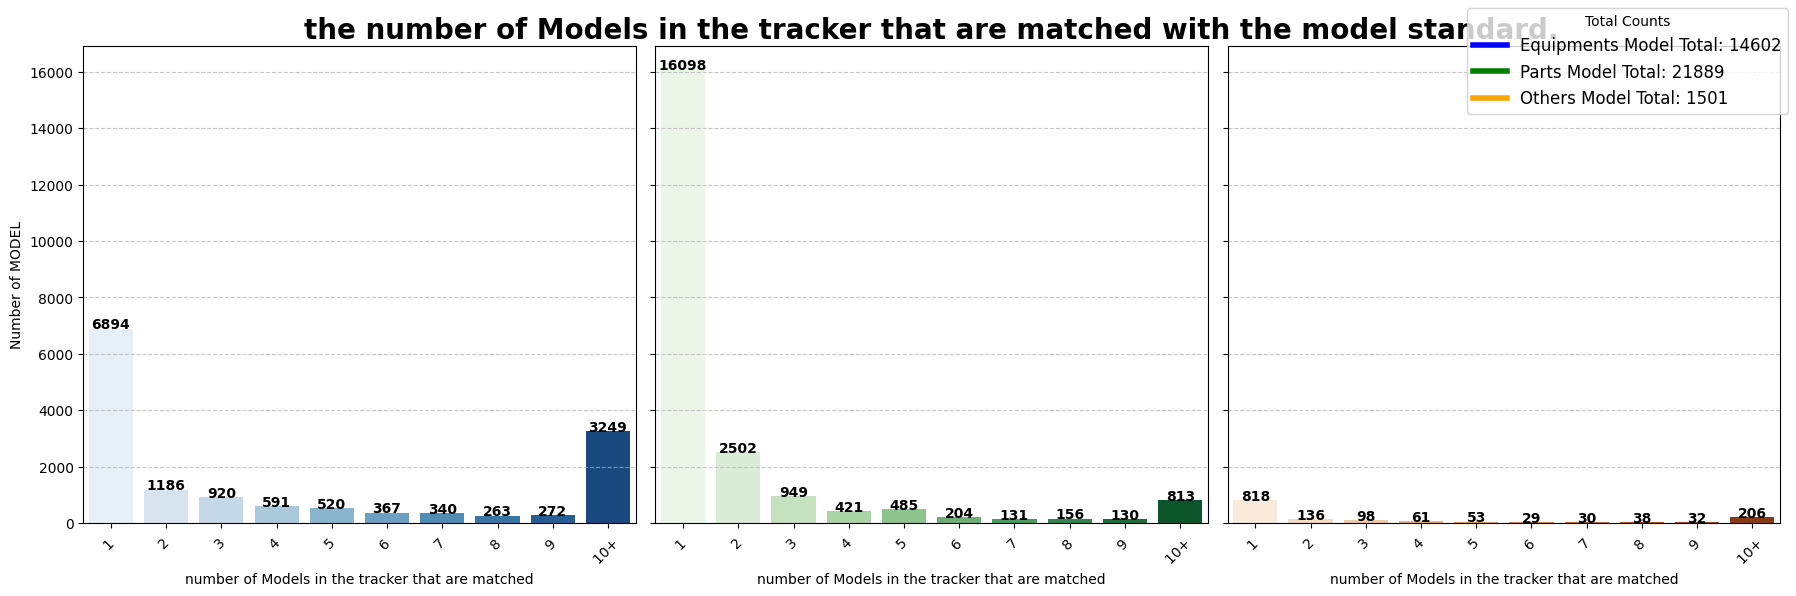

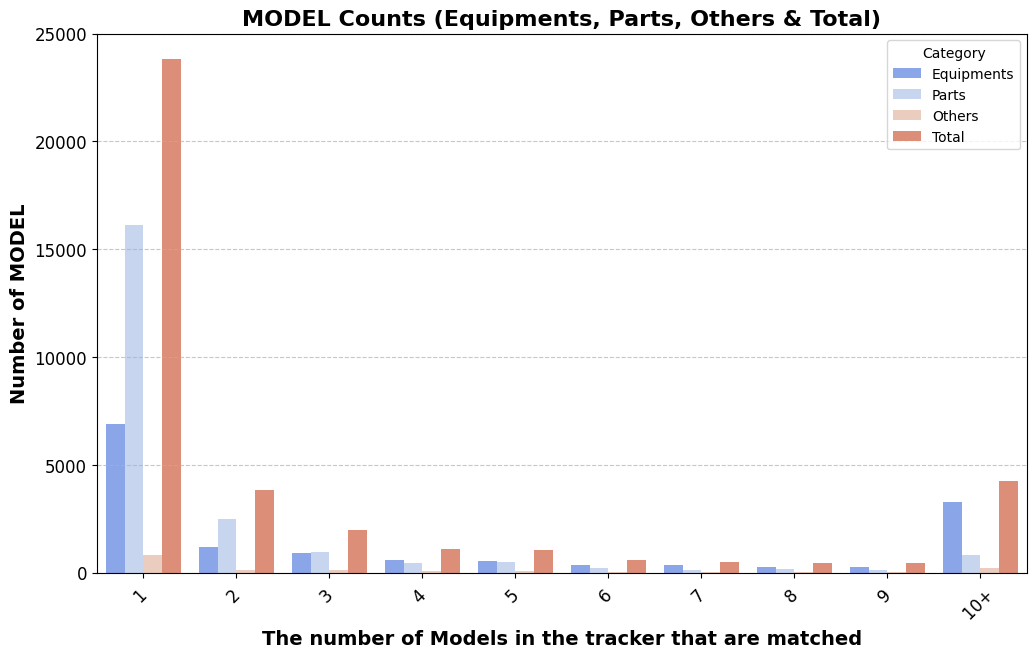

In [21]:
# Prevent negative sign issues
plt.rcParams["axes.unicode_minus"] = False

# Define function to filter and compute bin counts
def get_bin_counts(tracker_info, category_list, category_name):
    filtered_df = tracker_info[tracker_info["Category_Name"].isin(category_list)]
    filtered_df = filtered_df[filtered_df["STD_MODEL_YN"] == "Y"]

    model_counts = filtered_df["MODEL_ID"].value_counts()

    # Define bins (1 to 10 occurrences, and 10+ occurrences)
    max_count = model_counts.max()
    bins = list(range(1, 11))  # 1~10ÍπåÏßÄ Í∏∞Î≥∏ bin
    if max_count > 10:
        bins.append(max_count)  # 10Í∞ú Ïù¥ÏÉÅ Íµ¨Î∂ÑÏùÑ ÏúÑÌï¥ Ï∂îÍ∞Ä

    bin_labels = [f"{i} " for i in range(1, 10)] + ["10+ "]

    # Ensure bins are strictly increasing
    bins = sorted(set(bins))  

    # Assign each count to a bin
    bin_indices = np.digitize(model_counts, bins, right=True) - 1
    bin_indices = np.clip(bin_indices, 0, len(bin_labels) - 1)  # Ensure no negative values

    # Count the number of MODEL_IDs in each bin
    bin_counts = np.bincount(bin_indices, minlength=len(bin_labels))

    return pd.DataFrame({"Category": category_name, "Bin": bin_labels, "Count": bin_counts})

# Compute bin counts for each category
df_equipments = get_bin_counts(tracker_info, equipment_category, "Equipments")
df_parts = get_bin_counts(tracker_info, parts_category, "Parts")
df_others = get_bin_counts(tracker_info, others_category, "Others")

# Compute total count for legend
equipments_total = df_equipments["Count"].sum()
parts_total = df_parts["Count"].sum()
others_total = df_others["Count"].sum()

# üé® Individual plots with count labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Equipments
sns.barplot(data=df_equipments, x="Bin", y="Count", hue="Bin", palette="Blues", legend=False, ax=axes[0])
axes[0].set_title("", fontsize=20, fontweight="bold")
for i, row in df_equipments.iterrows():
    axes[0].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

# Plot for Parts
sns.barplot(data=df_parts, x="Bin", y="Count", hue="Bin", palette="Greens", legend=False, ax=axes[1])
axes[1].set_title("the number of Models in the tracker that are matched with the model standard.", fontsize=20, fontweight="bold")
for i, row in df_parts.iterrows():
    axes[1].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

# Plot for Others
sns.barplot(data=df_others, x="Bin", y="Count", hue="Bin", palette="Oranges", legend=False, ax=axes[2])
axes[2].set_title("", fontsize=20, fontweight="bold")
for i, row in df_others.iterrows():
    axes[2].text(i, row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

for ax in axes:
    ax.set_xticks(range(len(df_equipments["Bin"])))  # Fix ticks first
    ax.set_xticklabels(df_equipments["Bin"], rotation=45)
    ax.set_xlabel("number of Models in the tracker that are matched")
    ax.set_ylabel("Number of MODEL")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# üé® Î≤îÎ°Ä Ï∂îÍ∞Ä (Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ Ï¥ùÌï©)
handles = [
    plt.Line2D([0], [0], color="blue", lw=4, label=f"Equipments Model Total: {equipments_total}"),
    plt.Line2D([0], [0], color="green", lw=4, label=f"Parts Model Total: {parts_total}"),
    plt.Line2D([0], [0], color="orange", lw=4, label=f"Others Model Total: {others_total}"),
]
fig.legend(handles=handles, loc="upper right", fontsize=12, title="Total Counts")

plt.tight_layout()
plt.show()

df_total = pd.concat([df_equipments, df_parts, df_others])
df_total_grouped = df_total.groupby("Bin", as_index=False)["Count"].sum()
df_total_grouped["Category"] = "Total"

# Combine all for final visualization
df_final = pd.concat([df_total, df_total_grouped])

# üé® Combined plot with hue and count labels
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_final, x="Bin", y="Count", hue="Category", palette="coolwarm")

# for i, row in df_final.iterrows():
#     ax.text(i % len(df_final["Bin"].unique()), row["Count"] + 1, str(row["Count"]), ha="center", fontsize=10, fontweight="bold")

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("The number of Models in the tracker that are matched", fontsize=14, fontweight="bold")
plt.ylabel("Number of MODEL", fontsize=14, fontweight="bold")
plt.title("MODEL Counts (Equipments, Parts, Others & Total)", fontsize=16, fontweight="bold")
plt.legend(title="Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines

plt.show()


- trackerÏóêÏÑú Ïû•ÎπÑ modelÍ≥º Îß§Ïπ≠ÎêòÎäî Í∞úÏàò : 14,602 standard model Ïû•ÎπÑÏùò Í∞úÏàò : 17,383
- trackerÏóêÏÑú Î∂ÄÌíà modelÍ≥º Îß§Ïπ≠ÎêòÎäî Í∞úÏàò : 21,889 standard model Î∂ÄÌíàÏùò Í∞úÏàò : 366,470
- trackerÏóêÏÑú others modelÍ≥º Îß§Ïπ≠ÎêòÎäî Í∞úÏàò : 1,501 standard model othersÏùò Í∞úÏàò : 1,744

### Unknown Ï≤òÎ¶¨
Ïä§ÌÉ†Îã§ÎìúÎ™®Îç∏ÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† unknown Îç∞Ïù¥ÌÑ∞Í∞Ä 544Í∞úÎ°ú ÏÉÅÎãπÏàò ÏûàÏóàÏùå. Î∂àÌïÑÏöîÌïòÎã§Í≥† ÌåêÎã®ÎêòÏñ¥ ÏÇ≠Ï†ú Ìï†ÏòàÏ†ï

In [24]:
#(equipments_model_df.applymap(lambda x: str(x).lower() == "unknown")).sum()
equipments_model_df = equipments_model_df.replace("unknown", np.nan).dropna()

In [25]:
#(new_model_df.applymap(lambda x: str(x).lower() == "unknwon")).sum()
equipments_model_df = equipments_model_df.replace("unknwon", np.nan).dropna()

In [26]:
#(new_model_df.applymap(lambda x: str(x).lower() == "unkown")).sum()
equipments_model_df = equipments_model_df.replace("unkown", np.nan).dropna()

In [27]:
#(new_model_df.applymap(lambda x: str(x).lower() == "unkonwn")).sum()
equipments_model_df = equipments_model_df.replace("unkonwn", np.nan).dropna()

In [38]:
client = MilvusClient("../../DB/milvus1.db")

In [28]:
equipments_model_df

modelID    modelSTDName   MakerID  \
4       MO886711       CUWLS-080  MA252842   
8       MO345734   OS-OVN11-CL05    MA2817   
9       MO299924  OS-OVN11-CL01W    MA2817   
10      MO333933    OS-OVN11-C02    MA2817   
11      MO886710       CURWA-530  MA252842   
...          ...             ...       ...   
385608    MO6090         DMC200A    MA2737   
385609    MO5986      NEWVIEW600    MA2608   
385610    MO6690       TCT-62LMV     MA622   
385611     MO954         FAD2200    MA1487   
385612     MO955         FAD2300    MA1487   

                                               modelAlias category  \
4                                               CUWLS-080  PKG ETC   
8                                           OS-OVN11-CL05  PKG ETC   
9       OS OVN11CL01W,OS_OVN11CL01W,OSOVN11CL01W,OS-OV...  PKG ETC   
10                                           OS-OVN11-C02  PKG ETC   
11                                              CURWA-530  PKG ETC   
...                                                   ...      ...   
385608                                            DMC200A  PKG ETC   
385609                                         NEWVIEW600  PKG ETC   
385610                                          TCT-62LMV  PKG ETC   
385611                                            FAD2200  PKG ETC   
385612                                            FAD2300  PKG ETC   

                                                new_alias  
4                                             [CUWLS-080]  
8                                         [OS-OVN11-CL05]  
9       [OS OVN11CL01W, OS_OVN11CL01W, OSOVN11CL01W, O...  
10                                         [OS-OVN11-C02]  
11                                            [CURWA-530]  
...                                                   ...  
385608                                          [DMC200A]  
385609                                       [NEWVIEW600]  
385610                                        [TCT-62LMV]  
385611                                          [FAD2200]  
385612                                          [FAD2300]  

[17140 rows x 6 columns]

### BM25ÎûÄ?

**BM25**Îäî **Í≤ÄÏÉâ ÏóîÏßÑÏóêÏÑú Î¨∏ÏÑúÎ•º ÏàúÏúÑÌôîÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶ò**ÏûÑ.  
ÏâΩÍ≤å ÎßêÌïòÎ©¥, **ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûÖÎ†•Ìïú Í≤ÄÏÉâÏñ¥ÏôÄ Í∞ÄÏû• Í¥ÄÎ†®ÏÑ±Ïù¥ ÎÜíÏùÄ Î¨∏ÏÑúÎ•º Ï∞æÎäî Î∞©Î≤ï**ÏûÑ.



### BM25Ïùò ÌïµÏã¨ Í∞úÎÖê

1. **Îã®Ïñ¥Í∞Ä ÎßéÏù¥ ÎÇòÏò§Î©¥ Ï§ëÏöîÌï®!**  
   - Í≤ÄÏÉâÏñ¥(ÌÇ§ÏõåÎìú)Í∞Ä Î¨∏ÏÑúÏóêÏÑú Ïó¨Îü¨ Î≤à ÎÇòÏò§Î©¥, Í∑∏ Î¨∏ÏÑúÎäî Í≤ÄÏÉâÏñ¥ÏôÄ Îçî Í¥ÄÎ†®Ïù¥ ÏûàÎã§Í≥† ÌåêÎã®Ìï®.

2. **ÎÑàÎ¨¥ ÎßéÏù¥ ÎÇòÏò§Î©¥ Ïò§ÌûàÎ†§ Îçú Ï§ëÏöîÌï¥Ïßê!**  
   - ÏòàÎ•º Îì§Ïñ¥, "Ï∂ïÍµ¨"ÎùºÎäî Îã®Ïñ¥Í∞Ä 100Î≤à ÎÇòÏôîÎã§Í≥† Ìï¥ÏÑú Î¨¥Ï°∞Í±¥ Ï§ëÏöîÌïú Í≤ÉÏùÄ ÏïÑÎãò.  
   - ÌäπÏ†ï Îã®Ïñ¥Í∞Ä ÎÑàÎ¨¥ ÏûêÏ£º Îì±Ïû•ÌïòÎ©¥ **Ï§ëÎ≥µÎêú Ï†ïÎ≥¥Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏúºÎØÄÎ°ú Í∞ÄÏ§ëÏπòÎ•º ÎÇÆÏ∂§**.

3. **ÏßßÏùÄ Î¨∏ÏÑúÏùºÏàòÎ°ù Í≤ÄÏÉâÏñ¥Í∞Ä Îçî Ï§ëÏöîÌï®!**  
   - ÏòàÎ•º Îì§Ïñ¥, **"Ï∂ïÍµ¨ÎûÄ?"** Ïù¥ÎùºÎäî ÏßßÏùÄ Î¨∏ÏÑúÏóêÏÑú "Ï∂ïÍµ¨"Í∞Ä 3Î≤à ÎÇòÏò§Î©¥ ÍµâÏû•Ìûà Ï§ëÏöîÌïú Îã®Ïñ¥ÏûÑ.  
   - Î∞òÎ©¥, **"Ï∂ïÍµ¨ Ïó≠ÏÇ¨ Î∞è Í∑úÏπôÏóê ÎåÄÌïú ÎÖºÎ¨∏"** Í∞ôÏùÄ Í∏¥ Î¨∏ÏÑúÏóêÏÑú 3Î≤à ÎÇòÏôîÎã§Î©¥ Îçú Ï§ëÏöîÌï† ÏàòÎèÑ ÏûàÏùå.



### BM25Îäî Ïñ¥ÎîîÏóê Ïì∞ÏùºÍπå?

-  **Íµ¨Í∏Ä Í≤ÄÏÉâ ÏóîÏßÑ** ‚Üí ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûÖÎ†•Ìïú Í≤ÄÏÉâÏñ¥ÏôÄ Í¥ÄÎ†®Îêú Ïõπ ÌéòÏù¥ÏßÄ Ï∞æÍ∏∞  
-  **Ï†ÑÏûêÏÉÅÍ±∞Îûò (Ïòà: Ïø†Ìå°, ÏïÑÎßàÏ°¥)** ‚Üí Í≥†Í∞ùÏù¥ ÏõêÌïòÎäî ÏÉÅÌíàÏùÑ Îπ†Î•¥Í≤å Ï∂îÏ≤ú 
-  **Ï±óÎ¥á & AI** ‚Üí ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûÖÎ†•Ìïú ÏßàÎ¨∏Í≥º Í∞ÄÏû• Í¥ÄÎ†® ÏûàÎäî Î¨∏ÏÑúÎ•º Ï∞æÏïÑ ÎãµÎ≥Ä Ï†úÍ≥µ 



### Í≤∞Î°†

BM25Îäî **Í≤ÄÏÉâÏñ¥ÏôÄ Î¨∏ÏÑúÏùò Í¥ÄÎ†®ÏÑ±ÏùÑ Î∂ÑÏÑùÌïòÏó¨ ÏàúÏúÑÎ•º Îß§Í∏∞Îäî ÏïåÍ≥†Î¶¨Ï¶ò**ÏûÑ.  
Ï¶â, **"Ïù¥ Î¨∏ÏÑúÍ∞Ä Í≤ÄÏÉâÏñ¥ÏôÄ ÏñºÎßàÎÇò Ïûò ÎßûÎäîÏßÄ?"** Î•º ÌåêÎã®ÌïòÎäî Î∞©Î≤ïÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ Îê®! üòä


# Text Search

In [ ]:
equipments = set()

for _, row in equipments_model_df.iterrows():
    # modelSTDName, modelAliasÏóêÏÑú "Unknown" Ï≤òÎ¶¨
    model_std_name = str(row["modelSTDName"]) if row["modelSTDName"] is not None else ""
    model_alias = str(row["modelAlias"]) if row["modelAlias"] is not None else ""

    # "Unknown"Îßå ÏûàÎäî Í≤ΩÏö∞ NoneÏúºÎ°ú Î≥ÄÍ≤Ω, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ "Unknown" ÏÇ≠Ï†ú
    model_std_name = None if model_std_name.lower().strip() == "unknown" else model_std_name.replace("Unknown", "").strip()
    model_alias = None if model_alias.lower().strip() == "unknown" else model_alias.replace("Unknown", "").strip()

    # model_alias Í∏∏Ïù¥Î•º 450ÏûêÎ°ú Ï†úÌïú
    if model_alias:
        model_alias = model_alias[:460]

    # Í∞Å Ìñâ(row)Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌäúÌîåÎ°ú Ï†ÄÏû•
    equipment_tuple = (
        row["modelID"],
        #model_std_name,
        #row["MakerID"],
        model_alias,
        row["category"]
    )

    # ÌäúÌîåÏùÑ equipmentsÏóê Ï∂îÍ∞Ä
    equipments.add(equipment_tuple)

# ÌäúÌîåÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò (Í∏∏Ïù¥ Ï†úÌïú X)
docs = [" ".join(map(str, doc)) for doc in equipments]


In [44]:
docs

['MO242555 Summit RTP',
 'MO2943 X6UW-UNR Metrology',
 'MO2134 S-4200 Metrology',
 'MO2727 Unity2e 855SS Etch',
 'MO29452 MSR XL HD16 Chip Mounter',
 'MO239858 None PKG ETC',
 'MO357628 SH4-913024 ATE ETC',
 'MO344397 c.Oxidator200 Furnace',
 'MO343393 TW360 Handler',
 'MO238280 VDF-150MA Furnace',
 'MO248162 ANT-20 ATE ETC',
 'MO591 CPS-100VX Die Bonder',
 'MO14716 UA3150 Asher',
 'MO14754 DD-833V-8B Furnace',
 'MO344010 LLC1-51V-3 PKG ETC',
 'MO451 Centura Enabler Etch',
 'MO124331 4524D Wire Bonder',
 'MO60308 13-986-150 ATE ETC',
 'MO288279 Z-CONNECTION-PRINT EQUIPPED PKG ETC',
 'MO84742 SM131216-XY PKG ETC',
 'MO236648 ICONN ProCu Wire Bonder',
 'MO238408 FAaST 300SL Metrology',
 'MO3038 ZYNZILATOR WET',
 'MO278153 N4X Fab Others',
 'MO6881 M800 WET',
 'MO353451 YSM40R Chip Mounter',
 'MO374912 HXATL-1000 PKG ETC',
 'MO24959 VF-5300 Furnace',
 'MO43415 DJ-853D Furnace',
 'MO9620 IVS135 Metrology',
 'MO752813 XTR-2020-MV Fab Others',
 'MO754572 SC3000 Fab Others',
 'MO6561 DFG-83H/

In [45]:
# varcharÎ•º 512Î°ú ÏßÑÌñâÌñàÎäîÎç∞ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä ÏóÑÏ≤≠Í∏¥ Í≤ÉÎì§Ïù¥ ÏûàÎã§.
# ÏûêÎ¶¨Î∞îÎÄåÎäî Ï†ïÎèÑÏùò Î≥ÄÍ≤ΩÏù¥Ïñ¥ÏÑú 512Î°ú ÏûòÎùºÎÇ¥Ïñ¥ÎèÑ Ï∂©Î∂ÑÌï†Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.
for i, text in enumerate(docs):
    if 512<len(text):
        print(f"üîπ {i+1}Î≤àÏß∏ Î¨∏Ïû• Í∏∏Ïù¥: {len(text)}")
        print(docs[i])

In [46]:
from milvus_model.hybrid import BGEM3EmbeddingFunction

ef = BGEM3EmbeddingFunction(use_fp16=False, device="cuda")
dense_dim = ef.dim["dense"]

# Generate embeddings using BGE-M3 model
docs_embeddings = ef(docs)

/workspace/Large_languige_model/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pre tokenize: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1072/1072 [00:00<00:00, 3232.93it/s]
You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
Inference Embeddings: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1072/1072 [00:07<00:00, 139.22it/s]


- return Î∞ÄÏßëÎ∞±ÌÑ∞, sparse 2Í∞ÄÏßÄ Î∞±ÌÑ∞Î•º Î±âÏñ¥ÎÉÑ
- Î∞ÄÏßë(Dense) Î≤°ÌÑ∞	Î™®Îì† Ï∞®ÏõêÏóê Í∞íÏù¥ ÏûàÎäî Î≤°ÌÑ∞	[0.1, 0.2, 0.3, ..., 0.5]
- Ìù¨ÏÜå(Sparse) Î≤°ÌÑ∞	ÎåÄÎ∂ÄÎ∂Ñ 0Ïù¥Í≥†, Ï§ëÏöîÌïú Í∞íÎßå Ï†ÄÏû•	{(10, 0.4), (500, 0.8), (2000, 0.3)}

In [47]:
from pymilvus import (
    connections,
    utility,
    FieldSchema,
    CollectionSchema,
    DataType,
    Collection,
)

connections.connect(uri="./milvus.db")

fields = [
    # Use auto generated id as primary key
    FieldSchema(
        name="pk", dtype=DataType.VARCHAR, is_primary=True, auto_id=True, max_length=100
    ),
    # Store the original text to retrieve based on semantically distance
    FieldSchema(name="text", dtype=DataType.VARCHAR, max_length=512),
    # Milvus now supports both sparse and dense vectors,
    # we can store each in a separate field to conduct hybrid search on both vectors
    FieldSchema(name="sparse_vector", dtype=DataType.SPARSE_FLOAT_VECTOR),
    FieldSchema(name="dense_vector", dtype=DataType.FLOAT_VECTOR, dim=dense_dim),
]
schema = CollectionSchema(fields)

col_name = "stardard_model"
if utility.has_collection(col_name):
    Collection(col_name).drop()
col = Collection(col_name, schema, consistency_level="Strong")

sparse_index = {"index_type": "SPARSE_INVERTED_INDEX", "metric_type": "IP"}
col.create_index("sparse_vector", sparse_index)
dense_index = {"index_type": "AUTOINDEX", "metric_type": "IP"}
col.create_index("dense_vector", dense_index)
col.load()


- Sparse vector
input (G4)
- MO252 AIX 2800G4 HT MA78 2800 G4HT,2800G4-HT 6x6",2800G4-HT parts,AIX 2800G4 HT,AIX2800 G4 HT,AIX2800 G4HT,AIX2800G4HT,G4 2800HT MoCVD',
- "G4"	‚úÖ Í∞ÄÎä•	"AIX 2800G4 HT"ÏóêÏÑú Î∂ÑÎ¶¨Îêú Í≤ΩÏö∞ Í≤ÄÏÉâ Í∞ÄÎä•
- "G4HT"	‚ö†Ô∏è Î∂ÄÎ∂Ñ Í∞ÄÎä•	"G4HT"Í∞Ä ÌïòÎÇòÏùò Îã®Ïñ¥Î°ú Ïù∏ÏãùÎêòÎ©¥ Í≤ÄÏÉâ Ïñ¥Î†§ÏõÄ
- "2800G4HT"	‚ùå Ïñ¥Î†§ÏõÄ	"2800G4HT"Í∞Ä ÌïòÎÇòÏùò Îã®Ïñ¥Î°ú Ï≤òÎ¶¨ÎêòÎ©¥ Í≤ÄÏÉâÎêòÏßÄ ÏïäÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº
- "AIX"	‚úÖ Í∞ÄÎä•	TF-IDF/BM25ÏóêÏÑú ÎÜíÏùÄ Ï§ëÏöîÎèÑÎ•º Í∞ÄÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº
- "2800G4"	‚ö†Ô∏è Î∂ÄÎ∂Ñ Í∞ÄÎä•	"2800G4 HT"Ï≤òÎüº Î∂ÑÎ¶¨Îêú Í≤ΩÏö∞ Í≤ÄÏÉâ Í∞ÄÎä•, Ïïà Î∂ÑÎ¶¨ÎêòÎ©¥ Í≤ÄÏÉâ Ïñ¥Î†§ÏõÄ

In [48]:
for i in range(0, len(docs), 50):
    batched_entities = [
        docs[i : i + 50],
        docs_embeddings["sparse"][i : i + 50],
        docs_embeddings["dense"][i : i + 50],
    ]
    col.insert(batched_entities)
print("Number of entities inserted:", col.num_entities)


Number of entities inserted: 17143


# search Define

In [49]:
from pymilvus import (
    AnnSearchRequest,
    WeightedRanker,
)


def dense_search(col, query_dense_embedding, limit=5, cutoff=0.1):
    search_params = {"metric_type": "IP", "params": {}}
    res = col.search(
        [query_dense_embedding],
        anns_field="dense_vector",
        limit=limit,
        output_fields=["text"],
        param=search_params,
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]


def sparse_search(col, query_sparse_embedding, limit=5, cutoff=0.1):
    search_params = {
        "metric_type": "IP",
        "params": {},
    }
    res = col.search(
        [query_sparse_embedding],
        anns_field="sparse_vector",
        limit=limit,
        output_fields=["text"],
        param=search_params,
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]


def hybrid_search(
    col,
    query_dense_embedding,
    query_sparse_embedding,
    sparse_weight=1.0,
    dense_weight=1.0,
    limit=5,
    cutoff=0.1
):
    dense_search_params = {"metric_type": "IP", "params": {}}
    dense_req = AnnSearchRequest(
        [query_dense_embedding], "dense_vector", dense_search_params, limit=limit
    )
    sparse_search_params = {"metric_type": "IP", "params": {}}
    sparse_req = AnnSearchRequest(
        [query_sparse_embedding], "sparse_vector", sparse_search_params, limit=limit
    )
    rerank = WeightedRanker(sparse_weight, dense_weight)
    res = col.hybrid_search(
        [sparse_req, dense_req], rerank=rerank, limit=limit, output_fields=["text"]
    )[0]
    return [hit.get("text") for hit in res if hit.distance >= cutoff]

In [54]:
new_equipments_model_df=new_model_df[new_model_df['category'].isin(equipment_category)]
new_equipments_model_df[:30]

modelID      modelSTDName   MakerID category  \
21  MO886711         CUWLS-080  MA252842  PKG ETC   
25  MO345734     OS-OVN11-CL05    MA2817  PKG ETC   
26  MO299924    OS-OVN11-CL01W    MA2817  PKG ETC   
27  MO299924    OS-OVN11-CL01W    MA2817  PKG ETC   
28  MO299924    OS-OVN11-CL01W    MA2817  PKG ETC   
29  MO299924    OS-OVN11-CL01W    MA2817  PKG ETC   
30  MO333933      OS-OVN11-C02    MA2817  PKG ETC   
31  MO886710         CURWA-530  MA252842  PKG ETC   
32  MO886713           CB-C-22  MA273101  PKG ETC   
39  MO868747        NXT2000-AM    MA1538  SMT ETC   
40  MO236456             M3306    MA2464      WET   
48  MO884849      Aegis 1022EP      MA83      ECD   
50  MO287357      ACT12 Single  MA262092    Track   
51  MO287355       ACT8 Single  MA262092    Track   
52  MO287355       ACT8 Single  MA262092    Track   
53  MO287355       ACT8 Single  MA262092    Track   
54  MO287355       ACT8 Single  MA262092    Track   
55     MO471   Centura Tetra X     MA110     Etch   
56     MO471   Centura Tetra X     MA110     Etch   
57     MO471   Centura Tetra X     MA110     Etch   
58  MO224652  Centura Tetra ll     MA110     Etch   
59  MO224652  Centura Tetra ll     MA110     Etch   
60     MO470     Centura Tetra     MA110     Etch   
61     MO470     Centura Tetra     MA110     Etch   
62     MO470     Centura Tetra     MA110     Etch   
63     MO470     Centura Tetra     MA110     Etch   
64  MO374438   2300 e6 Kiyo FX    MA1200     Etch   
65  MO374438   2300 e6 Kiyo FX    MA1200     Etch   
66  MO374438   2300 e6 Kiyo FX    MA1200     Etch   
67  MO374438   2300 e6 Kiyo FX    MA1200     Etch   

                               modelAlias  
21                              CUWLS-080  
25                          OS-OVN11-CL05  
26                          OS OVN11CL01W  
27                          OS_OVN11CL01W  
28                           OSOVN11CL01W  
29                         OS-OVN11-CL01W  
30                           OS-OVN11-C02  
31                              CURWA-530  
32                                CB-C-22  
39                             NXT2000-AM  
40                                  M3306  
48                           Aegis 1022EP  
50                           ACT12 Single  
51                           ACT 8 Single  
52                     Act 8 Single Block  
53                            ACT8 Single  
54                    ACT-8(Single Block)  
55                        Centura Tetra X  
56  Centura Tetra X Advanced Reticle Etch  
57                          CenturaTetraX  
58                       Centura Tetra ll  
59            Centura Tetra ll Dry Etcher  
60                     Centura 5200 Tetra  
61                          Centura Tetra  
62                           CenturaTetra  
63                      TETRA MASK ETCHER  
64                        2300 e6 Kiyo FX  
65                         2300e6 KIYO FX  
66                         2300KIYO FX E6  
67                             e6-Kiyo/FX

In [60]:
query_embeddings = ef(["2300KIYO FX E6"])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]],cutoff=0)
sparse_results

['MO374438 2300 e6 Kiyo FX Etch',
 'MO884684 2300 e6 Kiyo FX Chamber Etch',
 'MO273177 2300 Flex FX Etch',
 'MO289994 Stratus S300 FX ECD',
 'MO284879 2300 Flex FX Chamber Etch']

In [62]:
query_embeddings = ef(["OS-OVN11-CL05"])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)
hybrid_results

['MO345734 OS-OVN11-CL05 PKG ETC',
 'MO235556 OS-OVN11-CL02 PKG ETC',
 'MO235557 OS-OVN11-CL03 PKG ETC',
 'MO115126 OS-OVN11-CL02F PKG ETC',
 'MO299924 OS-OVN11-CL01W PKG ETC']

# ÏãúÌóòÌÖåÏä§Ìä∏

In [43]:
# Enter your search query
query = input("Enter your search query: ")
print(query)

# Generate embeddings for the query
query_embeddings = ef([query])
# print(query_embeddings)

aix


In [68]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)

In [69]:
unknown_df = tracker_info[
    (tracker_info["STD_MODEL_YN"] == "Y") & (tracker_info["Category_Name"] == "Fab Others")
]
unknown_df.iloc[10:]

Category_Code Category_Name  MAKER_ID  MAKER_NAME  MODEL_ID  \
7406       COMPONENT    Fab Others    MA1561       Nikon    MO8808   
7412       COMPONENT    Fab Others   MA18089       Asyst    MO1369   
8005       COMPONENT    Fab Others    MA2088        SSEC  MO178099   
8147       COMPONENT    Fab Others     MA729    Fortrend  MO373685   
9541       COMPONENT    Fab Others     MA667    EV GROUP     MO932   
...              ...           ...       ...         ...       ...   
669301     COMPONENT    Fab Others    MA1446         MKS  MO241300   
669402     COMPONENT    Fab Others    MA1446         MKS  MO241300   
672820     COMPONENT    Fab Others    MA2729      DAIHEN   MO37129   
674285     COMPONENT    Fab Others  MA272815  WTC binder  MO343855   
674307     COMPONENT    Fab Others    MA1919      Sankyo  MO117726   

        MODEL_NAME              Process_NM  \
7406       Unknown       Remote controller   
7412       LPT2200                       Ôºç   
8005          3302       high water washer   
8147    LAMINA 203                     NaN   
9541        EVG640            Mask Aligner   
...            ...                     ...   
669301        Part  MKS parts for the ASP+   
669402        Part    [Part]MKS parts 2set   
672820      CMC-10                     NaN   
674285       78532                    Etch   
674307       SWH80                     NaN   

                                            Configuration SERIAL_NO VINTAGE  \
7406    Module : Photo Tool Deconed(O)Tool Deinstalled...       NaN     NaN   
7412                                                    Ôºç         „Éº     NaN   
8005    Handle idle (production machine) Support 12 in...       NaN     NaN   
8147                                                  NaN       NaN     NaN   
9541                                                  NaN       NaN     NaN   
...                                                   ...       ...     ...   
669301                                                NaN       NaN     NaN   
669402                    Auto Match, Magnetron,ÎèÑÌååÍ¥Ä,Etc.,      EB85    1999   
672820  Qty : 3 / Title : DAIHEN CMC-10 AUTO TUNE CONT...       NaN     NaN   
674285                                                NaN    990063    2000   
674307                                                NaN       NaN     NaN   

        ...                                         Seller  \
7406    ...                             GES Associates LLC   
7412    ...  Sumitomo Mitsui Finance and Leasing Co., Ltd.   
8005    ...            Siliconware Precision Ind. Co. Ltd.   
8147    ...                              Intel Corporation   
9541    ...                 Macquarie Electronics USA Inc.   
...     ...                                            ...   
669301  ...                                         Pascal   
669402  ...                            SurplusGLOBAL, Inc.   
672820  ...                  Capitol Area Technology, LLC.   
674285  ...                      GLOBALFOUNDRIES U.S. Inc.   
674307  ...                            E-Tech Solution Inc   

                                                    Owner USER_FAB_ID  \
7406    Texas Instruments Semiconductor Manufacturing ...         NaN   
7412           Sony Semiconductor Manufacturing Co., Ltd.         NaN   
8005                  Siliconware Precision Ind. Co. Ltd.         NaN   
8147                                    Intel Corporation         NaN   
9541                                           Qorvo, Inc         NaN   
...                                                   ...         ...   
669301                                SurplusGLOBAL, Inc.         NaN   
669402                                SurplusGLOBAL, Inc.         NaN   
672820                      Capitol Area Technology, LLC.         NaN   
674285                          GLOBALFOUNDRIES U.S. Inc.         NaN   
674307                                E-Tech Solution Inc         NaN   

       COUNTRY_CD P&C      COD

In [64]:
equipments_tracker_df=tracker_info[tracker_info['Category_Name'].isin(equipment_category)]
equipments_tracker_df

Category_Code     Category_Name MAKER_ID MAKER_NAME MODEL_ID  \
1       REFLOW_SOLDERING  Reflow&Soldering    MA752   Furukawa   MO6845   
3           CHIP_MOUNTER      Chip Mounter    MA740       Fuji    MO588   
4             DICING_SAW        Dicing Saw    MA522      Disco    MO719   
105          WIRE_BONDER       Wire Bonder    MA179        ASM    MO430   
206          WIRE_BONDER       Wire Bonder    MA179        ASM    MO430   
...                  ...               ...      ...        ...      ...   
674632               PVD               PVD    MA110       AMAT    MO869   
674633               PVD               PVD    MA110       AMAT    MO869   
674634               PVD               PVD    MA110       AMAT    MO869   
674635               PVD               PVD    MA110       AMAT    MO869   
674643      BACK_GRINDER      Back Grinder     MA13  Accretech   MO1930   

          MODEL_NAME    Process_NM  \
1       XNIII-725PCG  Reflow oven_   
3            CP-842E  Chip mounter   
4             DFD640     Wafer Saw   
105          Eagle60   Wire Bonder   
206          Eagle60   Wire Bonder   
...              ...           ...   
674632      Endura 2         METAL   
674633      Endura 2           NaN   
674634      Endura 2           NaN   
674635      Endura 2           NaN   
674643         PG200  Back Grinder   

                                            Configuration SERIAL_NO VINTAGE  \
1                                                     NaN    X04597    2000   
3                                                     NaN       538    2004   
4                                  Including CSP Function    EL1403    1996   
105                                                   NaN  E649-028    2008   
206                                                   NaN  E626-031    2005   
...                                                   ...       ...     ...   
674632  OEM: AMAT  Tool Model: Endura2  Software Versi...       NaN    2004   
674633  OEM: AMAT  Tool Model: Endura2  Software Versi...       NaN     NaN   
674634                                                NaN       NaN     NaN   
674635                                                NaN       NaN     NaN   
674643             Vacuum Pump, Chiller, Air Dryer, PG200  P03001BY    2004   

        ...                                 Seller  \
1       ...                    JINUTEC CORPORATION   
3       ...                                    DHC   
4       ...                               SEMI RUN   
105     ...                     ENERCORE CO., LTD.   
206     ...                     ENERCORE CO., LTD.   
...     ...                                    ...   
674632  ...  Macquarie Asset Finance Japan Limited   
674633  ...  Macquarie Asset Finance Japan Limited   
674634  ...  Macquarie Asset Finance Japan Limited   
674635  ...  Macquarie Asset Finance Japan Limited   
674643  ...                    SurplusGLOBAL, Inc.   

                                 Owner USER_FAB_ID COUNTRY_CD P&C    CODE  \
1                  JINUTEC CORPORATION         NaN        NaN   N     NaN   
3                                  DHC         NaN        NaN   N     NaN   
4                             SEMI RUN         NaN         KR   N     NaN   
105                 ENERCORE CO., LTD.         NaN         KR   N     NaN   
206                 ENERCORE CO., LTD.         NaN         KR   N     NaN   
...                                ...         ...        ...  ..     ...   
674632  Micron Memory Taiwan Co., Ltd.         NaN         TW   N     NaN   
674633  Micron Memory Taiwan Co., Ltd.         NaN         TW   N  216821   
674634  Micron Memory Taiwan Co., Ltd.         NaN         TW   N  220939   
674635  Micron Technology Taiwan, Inc.         NaN         TW   N  220938   
674643                            INTS         NaN         KR   N     NaN   

       STD_MODEL_YN STD_MAKER_YN Process(model Info)  \
1                 Y            Y                 NaN   
3                 

In [65]:
from tqdm import tqdm
i = 0


for eq_name, eq_id in tqdm(equipments_tracker_df[equipments_tracker_df["STD_MODEL_YN"] == "Y"][["MODEL_NAME", "MODEL_ID"]].values[:1000]):
    try:
        # eq_nameÏù¥ intÏù∏ Í≤ΩÏö∞ Í∞êÏßÄ & Ïò§Î•ò Ï∂úÎ†•
        if isinstance(eq_name, int):
            raise ValueError(f"‚ö† Ïò§Î•ò: MODEL_NAME({eq_name})Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!")

        eq_name = str(eq_name)  # Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
        #print(eq_name, eq_id)

        # Í≤ÄÏÉâ ÏàòÌñâ
        query_embeddings = ef([eq_name])
        sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
        #print(sparse_results)

        # Í≤∞Í≥º Î∂ÑÏÑù
        keyword = sparse_results[0].split(" ")[0] if sparse_results else None
        #print(keyword)
        if keyword == eq_id:
            i += 1
        else:
            print(f"üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: {eq_name}, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: {eq_id}, searchÍ∞Ä Ï∞æÏùÄ Í∞í: {keyword}")

    except ValueError as e:
        print(f"‚ùå {e}")  # `eq_name`Ïù¥ intÏòÄÏùÑ Îïå Ïò§Î•ò Î©îÏãúÏßÄ Ï∂úÎ†•
    except Exception:
        print(f"‚ùå standard model Î™ªÏ∞æÏùå: {eq_name}, {eq_id}")
        

print(f"‚úÖ ÏùºÏπòÌïòÎäî Î™®Îç∏ Ïàò: {i}")


  2%|‚ñè         | 18/1000 [00:00<00:30, 32.47it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Eagle10, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO426, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: AIT XUV, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO247, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO243


  3%|‚ñé         | 26/1000 [00:00<00:29, 33.27it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: AIT XUV, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO247, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO243
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: AIT XUV, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO247, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO243
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15308, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15308, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15308, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Producer S, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1976, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO295653


  3%|‚ñé         | 34/1000 [00:01<00:28, 33.95it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MarkVz, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1484, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: FPA-3000i5, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1013, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO284629
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: CV8000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO605, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO184387


  4%|‚ñç         | 42/1000 [00:01<00:27, 34.86it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: S-8820, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2159, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2160
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P5000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1818, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234274
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Endura, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO849, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO311391


  5%|‚ñå         | 50/1000 [00:01<00:27, 34.93it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: EVG850, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO933, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO207186
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: FPA-2500i3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1005, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1003


  6%|‚ñå         | 62/1000 [00:01<00:26, 35.52it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W80A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2404, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO339665
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W80A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2404, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO339665
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W80A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2404, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO339665
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MetaPULSE, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO855, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO789927


  7%|‚ñã         | 74/1000 [00:02<00:25, 35.71it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SC-W60A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO286442, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO329765
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SC-W636-C, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2210, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO6588
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SC-W60A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO286442, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO329765
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SC-W60A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO286442, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO329765
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SC-W60A-AVG, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO327168, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO329765
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SC-W80A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO286445, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286441


  8%|‚ñä         | 82/1000 [00:02<00:26, 34.56it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 80B, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6586, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


  9%|‚ñâ         | 90/1000 [00:02<00:26, 34.49it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MarkVz, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1484, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MarkVz, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1484, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MarkVz, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1484, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 10%|‚ñà         | 102/1000 [00:02<00:26, 34.31it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-802V-H, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO667, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO310395
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DJ-803V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO757, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO103229
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-803V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO669, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO14748
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-802V-H, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO667, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO310395
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-802V-H, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO667, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO310395
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-8S-C, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO318, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO322297


 11%|‚ñà         | 110/1000 [00:03<00:26, 33.45it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-8S-Z, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO297898
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: VTR7000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2871, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2872
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: VTR7000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2871, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2872
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: VTR7000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2871, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2872
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: VTR7000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2871, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2872
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: VTR7000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2871, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2872


 12%|‚ñà‚ñè        | 122/1000 [00:03<00:25, 34.58it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: CDE-7-3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO5500, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO298528
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: RAM-250, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO233429, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO280222
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: RAM-250, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO233429, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO280222


 13%|‚ñà‚ñé        | 130/1000 [00:03<00:25, 34.17it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: PE-615, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO5257, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO5263
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M-308, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO42999, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO103778
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P5000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1818, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234274


 14%|‚ñà‚ñç        | 142/1000 [00:04<00:26, 32.98it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ceraus Zi-1000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO494, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO11116
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ceraus Zi-1000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO494, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO11116


 15%|‚ñà‚ñå        | 154/1000 [00:04<00:25, 32.88it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P5000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1845, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234274
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: EPO-222, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO885, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO887


 16%|‚ñà‚ñå        | 162/1000 [00:04<00:25, 32.85it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO60297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO60297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO60297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO60297, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SS-W60A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6591, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO327564


 17%|‚ñà‚ñã        | 174/1000 [00:05<00:25, 32.18it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: KLA5100, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1306, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SFS7600, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2273, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO242366
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SFS7700, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2275, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO242365


 19%|‚ñà‚ñä        | 186/1000 [00:05<00:25, 32.28it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: TREX-610, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2616, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO231792


 22%|‚ñà‚ñà‚ñè       | 222/1000 [00:06<00:22, 34.05it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4071A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO86, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4071A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO86, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 24%|‚ñà‚ñà‚ñç       | 242/1000 [00:07<00:22, 34.14it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2300 Exelan Flex45, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO47, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO298075


 25%|‚ñà‚ñà‚ñå       | 250/1000 [00:07<00:21, 34.57it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2658, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO334368
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2658, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO334368
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO282475, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO284839
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO282475, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO284839


 26%|‚ñà‚ñà‚ñå       | 258/1000 [00:07<00:21, 34.48it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: HT-9040, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO234793, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234794
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: HT-9040, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO234793, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234794


 27%|‚ñà‚ñà‚ñã       | 270/1000 [00:08<00:21, 34.61it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: V93000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2806, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO284834
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: V93000 PS800, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2813, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO39668
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SPA-300, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1839, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO5522


 28%|‚ñà‚ñà‚ñä       | 278/1000 [00:08<00:21, 34.37it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SRT-1000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6016, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-1505G6E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1652, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO235974
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-1505G6E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1652, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO235974


 29%|‚ñà‚ñà‚ñâ       | 294/1000 [00:08<00:20, 34.71it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MAXUM PLUS, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1493, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO25174
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MAXUM PLUS, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1493, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO25174
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: OP-2600, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1771, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1772


 30%|‚ñà‚ñà‚ñà       | 302/1000 [00:08<00:20, 34.60it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1389, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO14486, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 31%|‚ñà‚ñà‚ñà       | 310/1000 [00:09<00:20, 34.35it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 31%|‚ñà‚ñà‚ñà‚ñè      | 314/1000 [00:09<00:20, 34.29it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Mark8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 32%|‚ñà‚ñà‚ñà‚ñè      | 322/1000 [00:09<00:19, 34.33it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ISLinDA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274091, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ISLinDA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274091, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO86504, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: V93000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2806, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO284834
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: V93000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2806, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO284834


 33%|‚ñà‚ñà‚ñà‚ñé      | 330/1000 [00:09<00:19, 34.57it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: V93000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2806, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO284834
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ISLinDA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274091, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 34%|‚ñà‚ñà‚ñà‚ñç      | 338/1000 [00:09<00:19, 34.44it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728


 35%|‚ñà‚ñà‚ñà‚ñç      | 346/1000 [00:10<00:19, 34.35it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728


 35%|‚ñà‚ñà‚ñà‚ñå      | 354/1000 [00:10<00:18, 34.28it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF3000EX, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2659, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO296728


 38%|‚ñà‚ñà‚ñà‚ñä      | 378/1000 [00:10<00:11, 54.76it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ISLinDA, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274091, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(2017)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!


 40%|‚ñà‚ñà‚ñà‚ñâ      | 399/1000 [00:11<00:15, 38.57it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: T5371, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2478, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO19891
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO282475
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: V93000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2806, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO284834
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO282475
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO282475
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO282475


 40%|‚ñà‚ñà‚ñà‚ñà      | 404/1000 [00:11<00:15, 39.54it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Ag93000 C400E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO282475
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 8800FC, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO243199, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO299910
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(8800)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 8800FC Quantum, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO165, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO299910
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 8800FC Quantum, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO165, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO299910
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 8800FC Quantum, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO165, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO299910
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DFD6360, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO716, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO338938


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 417/1000 [00:12<00:16, 35.98it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: T5371, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2478, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO19891
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO241537, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO241537, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: CI-T120, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO506, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO249241
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: CI-T120, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO506, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO249241
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: CI-T120, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO506, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO249241
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: CI-T120, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO506, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO249241


 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 497/1000 [00:14<00:14, 33.78it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 601/1000 [00:17<00:11, 33.32it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 669/1000 [00:19<00:09, 33.65it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Y-1E, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO235632, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 677/1000 [00:19<00:09, 33.46it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008 HS3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 685/1000 [00:20<00:09, 33.40it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SM321, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO75427
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: M550, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1423, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: FPA-5000ES3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1020, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO754879


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 697/1000 [00:20<00:09, 33.09it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MD2000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1503, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SM321, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO75427


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 705/1000 [00:20<00:08, 33.20it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Part, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO335248, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Vector, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO360, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO330744
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: YV88Xg, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3026, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO3024
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SM321, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO75427


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 709/1000 [00:20<00:08, 33.20it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: T5377, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2481, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO19895
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura DPS Metal, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO274713, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO293165
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200S, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2655, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO95799


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 717/1000 [00:21<00:08, 33.23it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO280869
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO280869
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200S, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2655, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO95799
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO280869
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO280869
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO280869


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 725/1000 [00:21<00:08, 33.32it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200S, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2655, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO95799
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: OP-2600, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1771, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO1772
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unity SCCM, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2747, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO340929


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 737/1000 [00:21<00:07, 33.28it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Eagle10, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO426, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Endura, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO849, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO311391
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura WxZ, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO479, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO309418
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura WxZ, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO479, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO309418
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura WxZ, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO479, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO309418


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 745/1000 [00:21<00:07, 33.29it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8808, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 753/1000 [00:22<00:07, 33.24it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-8SE-ZVS, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO327, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO34441
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: S-8820, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2159, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO2160


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 765/1000 [00:22<00:07, 33.09it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-835V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO682, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234685
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DJ-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO788, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO14778
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DJ-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO788, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO14778
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DJ-835V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO784, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO14774
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688


 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 773/1000 [00:22<00:06, 33.13it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: DD-853V, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO686, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO688
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SE2000, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO333443, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MERCURY-MP, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO851, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 785/1000 [00:23<00:06, 33.20it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Endura, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO849, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO311391
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Endura, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO849, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO311391
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SC-W80A-A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO286445, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO286441
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: FLX5400, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO987, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO24598
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: RS75, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2115, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234587


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 797/1000 [00:23<00:06, 33.21it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura DxZ, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO443, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO309418
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura WxZ, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO479, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO309418
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Centura DxZ, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO443, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO309418
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SP1 TBI, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO276, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO60182


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 805/1000 [00:23<00:05, 33.23it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unity2e 85DD, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2719, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO320937
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: P22, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1817, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-2205i14E2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1681, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO8768
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NSR-2205i14E2, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1681, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO8768
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ACT8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO287355


 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 813/1000 [00:23<00:05, 33.13it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ACT8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO287355
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ACT8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO287355
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: KLA5200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1308, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: AIT II, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO244, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO337148


 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 825/1000 [00:24<00:05, 33.28it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MA6, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1443, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SB8e, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO259275, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Axiotron, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3223, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Axiotron, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO3223, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4073A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO90, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 833/1000 [00:24<00:05, 33.08it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: UF200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2650, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO280869
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4072A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO88, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4082A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO92, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO255165
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 4082A, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO92, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO255165
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: D10, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO15477, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 847/1000 [00:24<00:03, 47.96it/s]

‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(238)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: STM6, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO273200, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Cheetah, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO359772, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 857/1000 [00:25<00:03, 42.40it/s]

‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(236)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: F20, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO61844, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 867/1000 [00:25<00:03, 37.32it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: FE-VII, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO979, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO754472


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 879/1000 [00:25<00:03, 34.64it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-303i, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO281, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-303i, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO281, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-303i, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO281, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-303i, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO281, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-303i, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO281, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Alpha-303i, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO281, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Indy, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1185, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 883/1000 [00:25<00:03, 34.14it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Indy, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1185, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Indy, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1185, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Indy Plus, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO1186, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Trias, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2621, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO295063


 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 891/1000 [00:26<00:03, 33.43it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: E500, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO416, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO61774
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Vector Express, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO362, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Vector Express, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO362, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 906/1000 [00:26<00:02, 40.84it/s]

‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(4000)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(4000)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
‚ùå ‚ö† Ïò§Î•ò: MODEL_NAME(4000)Ïù¥ int ÌÉÄÏûÖÏûÖÎãàÎã§!
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2009 SSI, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO273330, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2009 SSI, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO273330, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2009 SSI, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO273330, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008XP3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO233993
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008XP3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO233993
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008XP3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO233993


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 919/1000 [00:26<00:02, 35.69it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: 2008XP3, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO6, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO233993
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO289244, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 923/1000 [00:26<00:02, 34.76it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SM321, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2328, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO75427


 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 935/1000 [00:27<00:01, 33.39it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ACT8, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO8, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO287355


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 959/1000 [00:28<00:01, 33.16it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MA200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO4568, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO60480
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MA200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO4568, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO60480
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: MA200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO4568, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO60480


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 963/1000 [00:28<00:01, 32.91it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ATRM-2100, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO307, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO10366
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SAT, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2181, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO101157, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SAT, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2181, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO101157, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Unknown, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO101157, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 975/1000 [00:28<00:00, 32.67it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: ACS200, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO227, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Gamma 80, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO251974, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO226423
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Gamma 80, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO251974, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO226423
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Gamma 80, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO251974, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO226423
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Gamma 80, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO251974, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO226423
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Gamma 80, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO251974, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO226423


 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 983/1000 [00:28<00:00, 32.87it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: Gamma 80, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO251974, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO226423
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: SST, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2383, searchÍ∞Ä Ï∞æÏùÄ Í∞í: None


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:29<00:00, 34.11it/s]

üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: RS75, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO2115, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO234587
üö® Ìä∏ÎûòÏª§ Î™®Îç∏Ïù¥Î¶Ñ: NanoSpec 6100, Ìä∏ÎûòÏª§ Î™®Îç∏ÏïÑÏù¥Îîî: MO169534, searchÍ∞Ä Ï∞æÏùÄ Í∞í: MO15842
‚úÖ ÏùºÏπòÌïòÎäî Î™®Îç∏ Ïàò: 704


In [34]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

In [35]:
query="SWH80"
query_embeddings = ef([query])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
keyword=sparse_results[0].split(" ")[0]
tracker_info[tracker_info["MODEL_ID"]==keyword]

Category_Code Category_Name MAKER_ID MAKER_NAME  MODEL_ID MODEL_NAME  \
137347     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
137348     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239318     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239462     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239465     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239479     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
239647     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
241868     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
402005     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   
674307     COMPONENT    Fab Others   MA1919     Sankyo  MO117726      SWH80   

                                            Process_NM  \
137347                                             NaN   
137348                                             NaN   
239318  SANKYO AUTO WET STATION FOR PHOTO RESIST STRIP   
239462                     NITRIDE STRIP AUTO WETBENCH   
239465                         SANKYO AUTO WET STATION   
239479                                     OXIDE_STRIP   
239647                            SANKYO NITRIDE STRIP   
241868                                  SALICIDE_STRIP   
402005                                  Salicide Strip   
674307                                             NaN   

                          Configuration    SERIAL_NO VINTAGE  ...  \
137347                              NaN          NaN     NaN  ...   
137348                              NaN          NaN     NaN  ...   
239318                              NaN   D208669501    1996  ...   
239462               Missing Parts Tool   D215199601    1997  ...   
239465                              NaN  DC215239602    1996  ...   
239479  WET Oxide Etch Bench, Automated   D215279601    1996  ...   
239647                              NaN   ADCT210501    1996  ...   
241868                              NaN   C277629501    1995  ...   
402005        Wet Bench, Salicide Strip          NaN    1996  ...   
674307                              NaN          NaN     NaN  ...   

                                   Seller                              Owner  \
137347  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
137348  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239318  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239462  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239465  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239479  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
239647  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
241868  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
402005  GLOBALFOUNDRIES SINGAPORE PTE LTD  GLOBALFOUNDRIES SINGAPORE PTE LTD   
674307                E-Tech Solution Inc                E-Tech Solution Inc   

       USER_FAB_ID COUNTRY_CD P&C      CODE STD_MODEL_YN STD_MAKER_YN  \
137347         NaN         SG   N  RCAS-A01            Y            Y   
137348         NaN         SG   N  RCAS-A02            Y            Y   
239318         NaN         SG   N  CRSAT-02            Y            Y   
239462         NaN         SG   N  NITAT-02            Y            Y   
239465         NaN         SG   N  RCAAT-05            Y            Y   
239479         NaN         SG   N  OXTAT-02            Y            Y   
239647         NaN         SG   N  NITW-A01            Y            Y   
241868         NaN         SG   N  SALAT-01            Y            Y   
402005         NaN         SG   N  SALAT-01            Y            Y   
674307         NaN         SG   N       NaN            Y            Y   

       Process(model Info) config(model Info)  
13734

In [36]:
sparse_results

['MO117726 SWH80 MA1919 SANKYO  SWH80,SWH80 Fab Others',
 'MO284567 NS-8080H MA1961 NS-8080H Handler',
 'MO2152 S-7280H MA881 7280H,s7280,S-7280,S7280H,S-7280H,S-7280-H,S7280-H,SEM7280-1,SEM7280-2 Metrology',
 'MO2840 VIISta 80 MA2456 80,Varian VIISta 80,Varian Vista80,VICSta 80,VIISta 80,Viista 80 Classic,VIIsta 80 HP PLUS,VIISTA80,VIIsta80 classi,VIISTA80 Sb,Viista80HC,VIISTA80-HIGH,Viista80HP+,VIIsta80HPPLUS,VIISTAA80,Vista 80,Vista80,Vista80HP+,VllSta 80 Implant',
 'MO275720 80H3149 MA1305 80H3149,80H3149???????????? Fab Others']

In [37]:
def doc_text_formatting(ef, query, docs):
    tokenizer = ef.model.tokenizer
    query_tokens_ids = tokenizer.encode(query, return_offsets_mapping=True)
    query_tokens = tokenizer.convert_ids_to_tokens(query_tokens_ids)
    formatted_texts = []

    for doc in docs:
        ldx = 0
        landmarks = []
        encoding = tokenizer.encode_plus(doc, return_offsets_mapping=True)
        tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])[1:-1]
        offsets = encoding["offset_mapping"][1:-1]
        for token, (start, end) in zip(tokens, offsets):
            if token in query_tokens:
                if len(landmarks) != 0 and start == landmarks[-1]:
                    landmarks[-1] = end
                else:
                    landmarks.append(start)
                    landmarks.append(end)
        close = False
        formatted_text = ""
        for i, c in enumerate(doc):
            if ldx == len(landmarks):
                pass
            elif i == landmarks[ldx]:
                if close:
                    formatted_text += "</span>"
                else:
                    formatted_text += "<span style='color:red'>"
                close = not close
                ldx = ldx + 1
            formatted_text += c
        if close is True:
            formatted_text += "</span>"
        formatted_texts.append(formatted_text)
    return formatted_texts

In [38]:
from IPython.display import Markdown, display

# Dense search results
display(Markdown("**Dense Search Results:**"))
formatted_results = doc_text_formatting(ef, query, dense_results)
for result in dense_results:
    display(Markdown(result))

# Sparse search results
display(Markdown("\n**Sparse Search Results:**"))
formatted_results = doc_text_formatting(ef, query, sparse_results)
for result in formatted_results:
    display(Markdown(result))

# Hybrid search results
display(Markdown("\n**Hybrid Search Results:**"))
formatted_results = doc_text_formatting(ef, query, hybrid_results)
for result in formatted_results:
    display(Markdown(result))

**Dense Search Results:**

MO241544 AIX200 MA78 AIX200 MoCVD

MO239 AIM AX MA740 AIM AX,AIMAX Chip Mounter

MO291388 AIX2400 MA78 2400,AIX2400,Aixtron 2400 MoCVD

MO42603 AIX2600 MA78 AIX2600 MoCVD

MO291377 AIX2400 G2 MA78 2400/G2,AIX2400 G2,G2 MoCVD


**Sparse Search Results:**

MO117726<span style='color:red'> SWH80</span> MA1919 SANKYO <span style='color:red'> SWH80</span>,SW<span style='color:red'>H80</span> Fab Others

MO284567 NS-80<span style='color:red'>80H</span> MA1961 NS-80<span style='color:red'>80H</span> Handler

MO2152 S-7280<span style='color:red'>H</span> MA881 7280<span style='color:red'>H</span>,s72<span style='color:red'>80</span>,S-7280,S72<span style='color:red'>80H</span>,S-7280<span style='color:red'>H</span>,S-7280-<span style='color:red'>H</span>,S72<span style='color:red'>80</span>-<span style='color:red'>H</span>,SEM7280-1,SEM72<span style='color:red'>80</span>-2 Metrology

MO2840 VIISta 80 MA2456 80,Varian VIISta 80,Varian Vista<span style='color:red'>80</span>,VICSta 80,VIISta 80,Viista 80 Classic,VIIsta 80 HP PLUS,VIISTA<span style='color:red'>80</span>,VIIsta<span style='color:red'>80</span> classi,VIISTA<span style='color:red'>80</span> Sb,Viista<span style='color:red'>80</span>HC,VIISTA<span style='color:red'>80</span>-<span style='color:red'>H</span>IGH,Viista<span style='color:red'>80</span>HP+,VIIsta<span style='color:red'>80H</span>PPLUS,VIISTAA<span style='color:red'>80</span>,Vista 80,Vista<span style='color:red'>80</span>,Vista<span style='color:red'>80</span>HP+,VllSta 80 Implant

MO275720 80<span style='color:red'>H</span>3149 MA1305 80<span style='color:red'>H</span>3149,<span style='color:red'>80H</span>3149???????????? Fab Others


**Hybrid Search Results:**

MO241544 AIX200 MA78 AIX200 MoCVD

MO239 AIM AX MA740 AIM AX,AIMAX Chip Mounter

MO291388 AIX2400 MA78 2400,AIX2400,Aixtron 2400 MoCVD

MO42603 AIX2600 MA78 AIX2600 MoCVD

MO291377 AIX2400 G2 MA78 2400/G2,AIX2400 G2,G2 MoCVD

### ÏïåÏïÑÎ¥êÏïº Ìï† ÎÇ¥Ïö©
- Ïä§ÌÉ†Îã§Îìú Î™®Îç∏ Ï§ëÏóêÏÑú modelSTDNAME, ModelAliasÍ∞Ä unknown ÎêòÏñ¥ ÏûàÎäîÎç∞  Ïñ¥Îñ§Í∏∞Ï§ÄÏóê ÏùòÌï¥ÏÑú categoryÎ°ú ÌåêÎã®ÎêúÍ≤ÉÏù∏ÏßÄ?
- unknownÏù¥ ÏÉÅÎãπÏàò Ï°¥Ïû¨ÌïòÎäîÎç∞ ÏßÄÏõåÎèÑ ÎêòÎäîÍ≤ÉÏù∏ÏßÄ?
- ÏûÖÎ†•ÎãπÏãúÏóê Ïä§ÌÉ†Îã§Îìú Î™®Îç∏ÏóêÏÑú Í≤ÄÏÉâÎêòÏßÄ ÏïäÏïòÏùÑ Í≤ΩÏö∞ modelÏùÑ ÏÉàÎ°ú add ÌïòÎäîÍ≤ÉÏúºÎ°ú ÏïåÍ≥† ÏûàÎäîÎç∞ Í≤∞Íµ≠ Í≤πÏπòÎäî Î™®Îç∏Îì§ÎèÑ ÏÉÅÎãπÌûà Ï°¥Ïû¨


In [53]:
tracker_info

Category_Code      Category_Name  MAKER_ID  \
0          GENERAL_TESTER     General Tester      MA45   
1        REFLOW_SOLDERING   Reflow&Soldering     MA752   
2       PRINTER_DISPENSER  Printer&Dispenser     MA881   
3            CHIP_MOUNTER       Chip Mounter     MA740   
4              DICING_SAW         Dicing Saw     MA522   
...                   ...                ...       ...   
674739           PARTS_PC        Part Others     MA110   
674740           PARTS_PC        Part Others  MA262092   
674741           PARTS_PC        Part Others     MA110   
674742           PARTS_PC        Part Others  MA283519   
674743           PARTS_PC        Part Others  MA283519   

                             MAKER_NAME  MODEL_ID        MODEL_NAME  \
0                             Advantest    MO6491             8595E   
1                              Furukawa    MO6845      XNIII-725PCG   
2                               Hitachi    MO2604          TPM-1100   
3                                  Fuji     MO588           CP-842E   
4                                 Disco     MO719            DFD640   
...                                 ...       ...               ...   
674739                             AMAT  MO400396        0150-20124   
674740                              TEL  MO659810  ES3D05-200162-12   
674741                             AMAT  MO400983        0200-35051   
674742  PARKER HANNIFIN CORP-COMPUMOTOR  MO797121        SVC2195M-7   
674743  PARKER HANNIFIN CORP-COMPUMOTOR  MO797120       SVC2195M6-7   

               Process_NM                                      Configuration  \
0       Spectrum Analyzer                                                NaN   
1            Reflow oven_                                                NaN   
2          Screen Printer                                                NaN   
3            Chip mounter                                                NaN   
4               Wafer Saw                             Including CSP Function   
...                   ...                                                ...   
674739                NaN  Qty : 2 / Title : Applied Materials (AMAT) 015...   
674740                NaN  Qty : 5 / Title : TEL ES3D05-200162-12 Ring, Q...   
674741                NaN  Qty : 3 / Title : Applied Materials (AMAT) 020...   
674742                NaN  Qty : 6 / Title : PARKER SVC2195M-7 VALVE SING...   
674743                NaN  Qty : 2 / Title : PARKER SVC2195M6-7 VALVE SIN...   

           SERIAL_NO VINTAGE  ...  \
0         4115A05086    2001  ...   
1             X04597    2000  ...   
2       667609AF6838    1996  ...   
3                538    2004  ...   
4             EL1403    1996  ...   
...              ...     ...  ...   
674739           NaN     NaN  ...   
674740           NaN     NaN  ...   
674741           NaN     NaN  ...   
674742           NaN     NaN  ...   
674743           NaN     NaN  ...   

                                                  Seller  \
0                                         Index Solution   
1                                    JINUTEC CORPORATION   
2        Kunshan Wospring Electronics Technology Co.,Ltd   
3                                                    DHC   
4                                               SEMI RUN   
...                                                  ...   
674739                     Capitol Area Technology, LLC.   
674740                     Capitol Area Technology, LLC.   
674741                     Capitol Area Technology, LLC.   
674742                     Capitol Area Technology, LLC.   
674743                     Capitol Area Technology, LLC.   

                                                   Owner USER_FAB_ID  \
0                                      DOULTECH Co., Ltd         NaN   
1                                    JINUTEC CORPORATION         NaN   
2        Kunshan Wospring Electronics Technology Co.,Ltd         NaN   
3                                              

In [54]:
dense_results = dense_search(col, query_embeddings["dense"][0])
sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
hybrid_results = hybrid_search(
    col,
    query_embeddings["dense"][0],
    query_embeddings["sparse"][[0]],
    sparse_weight=0.7,
    dense_weight=1.0,
)
dense_results[0].split(" ")[0],  sparse_results[0].split(" ")[0], hybrid_results[0].split(" ")[0]

('MO117726', 'MO117726', 'MO117726')

In [55]:
result_df = tracker_info[tracker_info["MODEL_ID"] == "MO117726"]

# Î™®Îì† Ïª¨ÎüºÏóê ÎåÄÌï¥ Ï§ëÎ≥µÏùÑ Ï†úÍ±∞Ìïú ÌõÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
column_data = {
    col: ", ".join(map(str, set(result_df[col].dropna().to_list()))) for col in result_df.columns
}

column_data  # ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î™®Îì† Ïª¨ÎüºÏùò Ï†ïÎ≥¥Î•º Î∞òÌôò


{'Category_Code': 'COMPONENT',
 'Category_Name': 'Fab Others',
 'MAKER_ID': 'MA1919',
 'MAKER_NAME': 'Sankyo',
 'MODEL_ID': 'MO117726',
 'MODEL_NAME': 'SWH80',
 'Process_NM': 'OXIDE_STRIP, Salicide Strip, SANKYO AUTO WET STATION FOR PHOTO RESIST STRIP, SALICIDE_STRIP, SANKYO AUTO WET STATION, NITRIDE STRIP AUTO WETBENCH, SANKYO NITRIDE STRIP',
 'Configuration': 'Wet Bench, Salicide Strip, WET Oxide Etch Bench, Automated, Missing Parts Tool',
 'SERIAL_NO': 'D208669501, ADCT210501, DC215239602, C277629501, D215199601, D215279601',
 'VINTAGE': '1995, 1996, 1997',
 'Tracker_availability': 'AVAIL, NOT_AVAIL',
 'Seller': 'GLOBALFOUNDRIES SINGAPORE PTE LTD, E-Tech Solution Inc',
 'Owner': 'GLOBALFOUNDRIES SINGAPORE PTE LTD, E-Tech Solution Inc',
 'USER_FAB_ID': '',
 'COUNTRY_CD': 'SG',
 'P&C': 'N',
 'CODE': 'NITW-A01, SALAT-01, OXTAT-02, NITAT-02, RCAS-A02, CRSAT-02, RCAS-A01, RCAAT-05',
 'STD_MODEL_YN': 'Y',
 'STD_MAKER_YN': 'Y',
 'Process(model Info)': '',
 'config(model Info)': ''}

# UI

In [72]:
import gradio as gr
import pandas as pd

def search(query):
    """
    ÏÇ¨Ïö©ÏûêÏùò Í≤ÄÏÉâÏñ¥(query)Î•º ÏûÖÎ†•Î∞õÏïÑ Dense, Sparse, Hybrid Í≤ÄÏÉâ Í≤∞Í≥ºÎ•º Î∞òÌôòÌïòÎäî Ìï®Ïàò.
    """
    # Generate embeddings for the query
    query_embeddings = ef([query])

    # Perform searches
    dense_results = dense_search(col, query_embeddings["dense"][0])
    sparse_results = sparse_search(col, query_embeddings["sparse"][[0]])
    hybrid_results = hybrid_search(
        col,
        query_embeddings["dense"][0],
        query_embeddings["sparse"][[0]],
        sparse_weight=0.7,
        dense_weight=1.0,
    )
    keyword1 = dense_results[0].split(" ")[0] if dense_results else ""
    keyword2 = sparse_results[0].split(" ")[0] if sparse_results else ""
    keyword3 = hybrid_results[0].split(" ")[0] if hybrid_results else ""

    return keyword1, keyword2, keyword3

# ÏÑ†ÌÉùÎêú Í≤ÄÏÉâ Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú tracker_info Ï°∞Ìöå
def get_tracker_info(selected_result):
    result_df = tracker_info[tracker_info["MODEL_ID"] == selected_result]
    if not result_df.empty:
        try:
            column_data = {
                col: ", ".join(map(str, set(result_df[col].dropna().to_list()))) for col in result_df.columns
            }
            return "\n".join([f"**{col}**: {val}\n" for col, val in column_data.items()])
        except Exception as e:
            return f"Error processing data: {str(e)}"
    return "No matching result found."

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("# Semiconductor History Search System")
    
    query_input = gr.Textbox(label="Enter your search query")
    search_button = gr.Button("Search")
    
    search_results = gr.Radio(label="Select a search result", choices=[])
    tracker_output = gr.Markdown(label="Tracker Info" )
    
    def update_radio(query):
        keyword1, keyword2, keyword3 = search(query)
        if not keyword1 and not keyword2 and not keyword3:
            return gr.update(choices=[], value=None), gr.Warning("Í≤ÄÏÉâ Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.")
        keyword1, keyword2, keyword3 = search(query)
        return gr.update(choices=[keyword1, keyword2, keyword3], value=keyword1)
    
    
    search_button.click(update_radio, inputs=query_input, outputs=search_results)
    search_results.change(get_tracker_info, inputs=search_results, outputs=tracker_output)
    
# Ïã§Ìñâ
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7872
* Running on public URL: https://141940a6156645ba87.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
